# Analysis of outputs of $\lambda_{\max}$ experiments

Load the results files generated by the `white_noise_2.py` script. Generate tables for $\LaTeX$. Generate plots for figures.

In [11]:
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
def data_file_path(
    system,
    DISCRETE=True,
    BASELINES=False,
    OFFSETS=(1, 252, 50),
    SEED=54321,
    SAMPLES=5000,
    LENGTH=2000,
    TEST_SEED=None,
    TEST_LENGTH=None,
    TEST_SAMPLES=1001,
    data_dir="./outputs/data/white_noise",
):
    """Generate full path of the data file for the given configuration values."""

    if TEST_SEED is None:
        TEST_SEED = 2 * SEED
    if TEST_LENGTH is None:
        TEST_LENGTH = LENGTH
    
    OFFSET_MIN, OFFSET_MAX, OFFSET_STEP = OFFSETS
    filename = "__".join(map(str, [SEED, SAMPLES, LENGTH, TEST_SEED, TEST_LENGTH, TEST_SAMPLES, system, DISCRETE, OFFSET_MIN, OFFSET_MAX, OFFSET_STEP, BASELINES]))
    return os.path.join(data_dir, f"{filename}.pkl")

In [5]:
def system_data(system, **kwargs):
    path = data_file_path(system, **kwargs)
    with open(path, "rb") as file:
        data = pickle.load(file)
    return data

# VISUALISATIONS

In [369]:
prediction_test_features = system_data("logistic", BASELINES=True)["test_features"]
prediction_test_predictions = system_data("logistic", BASELINES=True)["test_predictions"]

In [374]:
from classic_estimators import classic_names
from hvg_estimates import hvg_names
from crocker_estimates import crocker_names
from point_summary_estimates import point_summary_names
from tree_offset_divergence import div_names as divergence_names

In [375]:
print(classic_names)
print(hvg_names)
print(crocker_names)
print(point_summary_names)
print(divergence_names)

['Rosenstein', 'Eckmann', 'Kantz']
['HVG L1', 'HVG L2', 'HVG Linf', 'HVG Wasserstein']
['0D Betti Norm', '1D Betti Norm']
['kNN R(D)', "kNN E'(D)", 'kNN M(D)', 'OPN R(D)', "OPN E'(D)", 'OPN M(D)']
['Path Length L1', 'Path Length L2', 'Path Length Linf', 'Path Length L1 (reverse)', 'Path Length L2 (reverse)', 'Path Length Linf (reverse)', 'Path Length Hist Wasserstein', 'Path Length Hist L1', 'Path Length Hist L2', 'Path Length Hist Linf', 'Cophenetic Length L1', 'Cophenetic Length L2', 'Cophenetic Length Linf', 'Cophenetic Length L1 (reverse)', 'Cophenetic Length L2 (reverse)', 'Cophenetic Length Linf (reverse)', 'Cophenetic Length Hist Wasserstein', 'Cophenetic Length Hist L1', 'Cophenetic Length Hist L2', 'Cophenetic Length Hist Linf', 'Path Weight L1', 'Path Weight L2', 'Path Weight Linf', 'Path Weight L1 (reverse)', 'Path Weight L2 (reverse)', 'Path Weight Linf (reverse)', 'Path Weight Hist Wasserstein', 'Path Weight Hist L1', 'Path Weight Hist L2', 'Path Weight Hist Linf', 'Cophen

In [377]:
# model should be picked based on training scores
system = "logistic"
best_classic_C = "Eckmann"
best_classic_R = "Kantz"
best_classic_C_model = "MLPC"
best_classic_R_model = "SVR"
best_hvg_C = "HVG Wasserstein"
best_hvg_R = "HVG L1"
best_hvg_C_model = "MLPC"
best_hvg_R_model = "SVR"
best_crocker_C = "1D Betti Norm"
best_crocker_R = "0D Betti Norm"
best_crocker_C_model = "MLPC"
best_crocker_R_model = "SVR"
best_point_summary_C = "OPN R(D)"
best_point_summary_R = "OPN M(D)"
best_point_summary_C_model = "SVC"
best_point_summary_R_model = "SVR"
best_divergence_C = "Path Weight Hist Wasserstein"
best_divergence_R = "Cophenetic Weight Hist L2"
best_divergence_C_model = "MLPC"
best_divergence_R_model = "SVR"


In [419]:
feature_types = list(prediction_test_features.keys())
feature_types

['classic', 'crocker', 'hvg', 'point_summary', 'divergence']

In [382]:
classic_features_C = prediction_test_features["classic"][:,classic_names.index(best_classic_C)]
classic_features_R = prediction_test_features["classic"][:,classic_names.index(best_classic_R)]
classic_predictions_C = prediction_test_predictions["classic"][best_classic_C][best_classic_C_model]
classic_predictions_R = prediction_test_predictions["classic"][best_classic_R][best_classic_R_model]
hvg_features_C = prediction_test_features["hvg"][:,hvg_names.index(best_hvg_C)]
hvg_features_R = prediction_test_features["hvg"][:,hvg_names.index(best_hvg_R)]
hvg_predictions_C = prediction_test_predictions["hvg"][best_hvg_C][best_hvg_C_model]
hvg_predictions_R = prediction_test_predictions["hvg"][best_hvg_R][best_hvg_R_model]
crocker_features_C = prediction_test_features["crocker"][:,crocker_names.index(best_crocker_C)]
crocker_features_R = prediction_test_features["crocker"][:,crocker_names.index(best_crocker_R)]
crocker_predictions_C = prediction_test_predictions["crocker"][best_crocker_C][best_crocker_C_model]
crocker_predictions_R = prediction_test_predictions["crocker"][best_crocker_R][best_crocker_R_model]
point_summary_features_C = prediction_test_features["point_summary"][:,point_summary_names.index(best_point_summary_C)]
point_summary_features_R = prediction_test_features["point_summary"][:,point_summary_names.index(best_point_summary_R)]
point_summary_predictions_C = prediction_test_predictions["point_summary"][best_point_summary_C][best_point_summary_C_model]
point_summary_predictions_R = prediction_test_predictions["point_summary"][best_point_summary_R][best_point_summary_R_model]
divergence_features_C = prediction_test_features["divergence"][:,divergence_names.index(best_divergence_C)]
divergence_features_R = prediction_test_features["divergence"][:,divergence_names.index(best_divergence_R)]
divergence_predictions_C = prediction_test_predictions["divergence"][best_divergence_C][best_divergence_C_model]
divergence_predictions_R = prediction_test_predictions["divergence"][best_divergence_R][best_divergence_R_model]


In [421]:
features_and_predictions = {
    "classic": {
        "fC": classic_features_C,
        "fR": classic_features_R,
        "pC": classic_predictions_C,
        "pR": classic_predictions_R,
        "bC": best_classic_C,
        "bR": best_classic_R,
        "bCm": best_classic_C_model,
        "bRm": best_classic_R_model,
    },
    "hvg": {
        "fC": hvg_features_C,
        "fR": hvg_features_R,
        "pC": hvg_predictions_C,
        "pR": hvg_predictions_R,
        "bC": best_hvg_C,
        "bR": best_hvg_R,
        "bCm": best_hvg_C_model,
        "bRm": best_hvg_R_model,
    },
    "crocker": {
        "fC": crocker_features_C,
        "fR": crocker_features_R,
        "pC": crocker_predictions_C,
        "pR": crocker_predictions_R,
        "bC": best_crocker_C,
        "bR": best_crocker_R,
        "bCm": best_crocker_C_model,
        "bRm": best_crocker_R_model,
    },
    "point_summary": {
        "fC": point_summary_features_C,
        "fR": point_summary_features_R,
        "pC": point_summary_predictions_C,
        "pR": point_summary_predictions_R,
        "bC": best_point_summary_C,
        "bR": best_point_summary_R,
        "bCm": best_point_summary_C_model,
        "bRm": best_point_summary_R_model,
    },
    "divergence": {
        "fC": divergence_features_C,
        "fR": divergence_features_R,
        "pC": divergence_predictions_C,
        "pR": divergence_predictions_R,
        "bC": best_divergence_C,
        "bR": best_divergence_R,
        "bCm": best_divergence_C_model,
        "bRm": best_divergence_R_model,
    },

}

In [359]:
import pickle
import os
import ipyparallel as ipp
from trajectories import generate_trajectories

# Provide clients to an ipyparallel cluster for faster parallel processing

clients = ipp.Client()
dv = clients.direct_view()
lbv = clients.load_balanced_view()

# Specify the trajectory generation criteria

SEED = 54321  # consistent random number generation
SAMPLES = 5000  # number of trajectories
LENGTH = 2000  # number of points per trajectory
TEST_SEED = SEED * 2
TEST_LENGTH = LENGTH
TEST_SAMPLES = 1001

filename_test_data = os.path.join("outputs/white_noise", "__".join(map(str, [SEED, LENGTH, SAMPLES, TEST_SEED, TEST_LENGTH, TEST_SAMPLES])) + "__test_data.pkl")
if not os.path.exists(filename_test_data):
    with open(filename_test_data, "wb") as file:
        data_ = generate_trajectories(RANDOM_SEED=TEST_SEED, TS_LENGTH=TEST_LENGTH, CONTROL_PARAM_SAMPLES=TEST_SAMPLES)
        pickle.dump(data_, file)

with open(filename_test_data, "rb") as file:
    system_test_data = pickle.load(file)


In [449]:
y_true = system_test_data[system]["lces"]
y_params = system_test_data[system]["sys_params"]


In [432]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, mean_squared_error

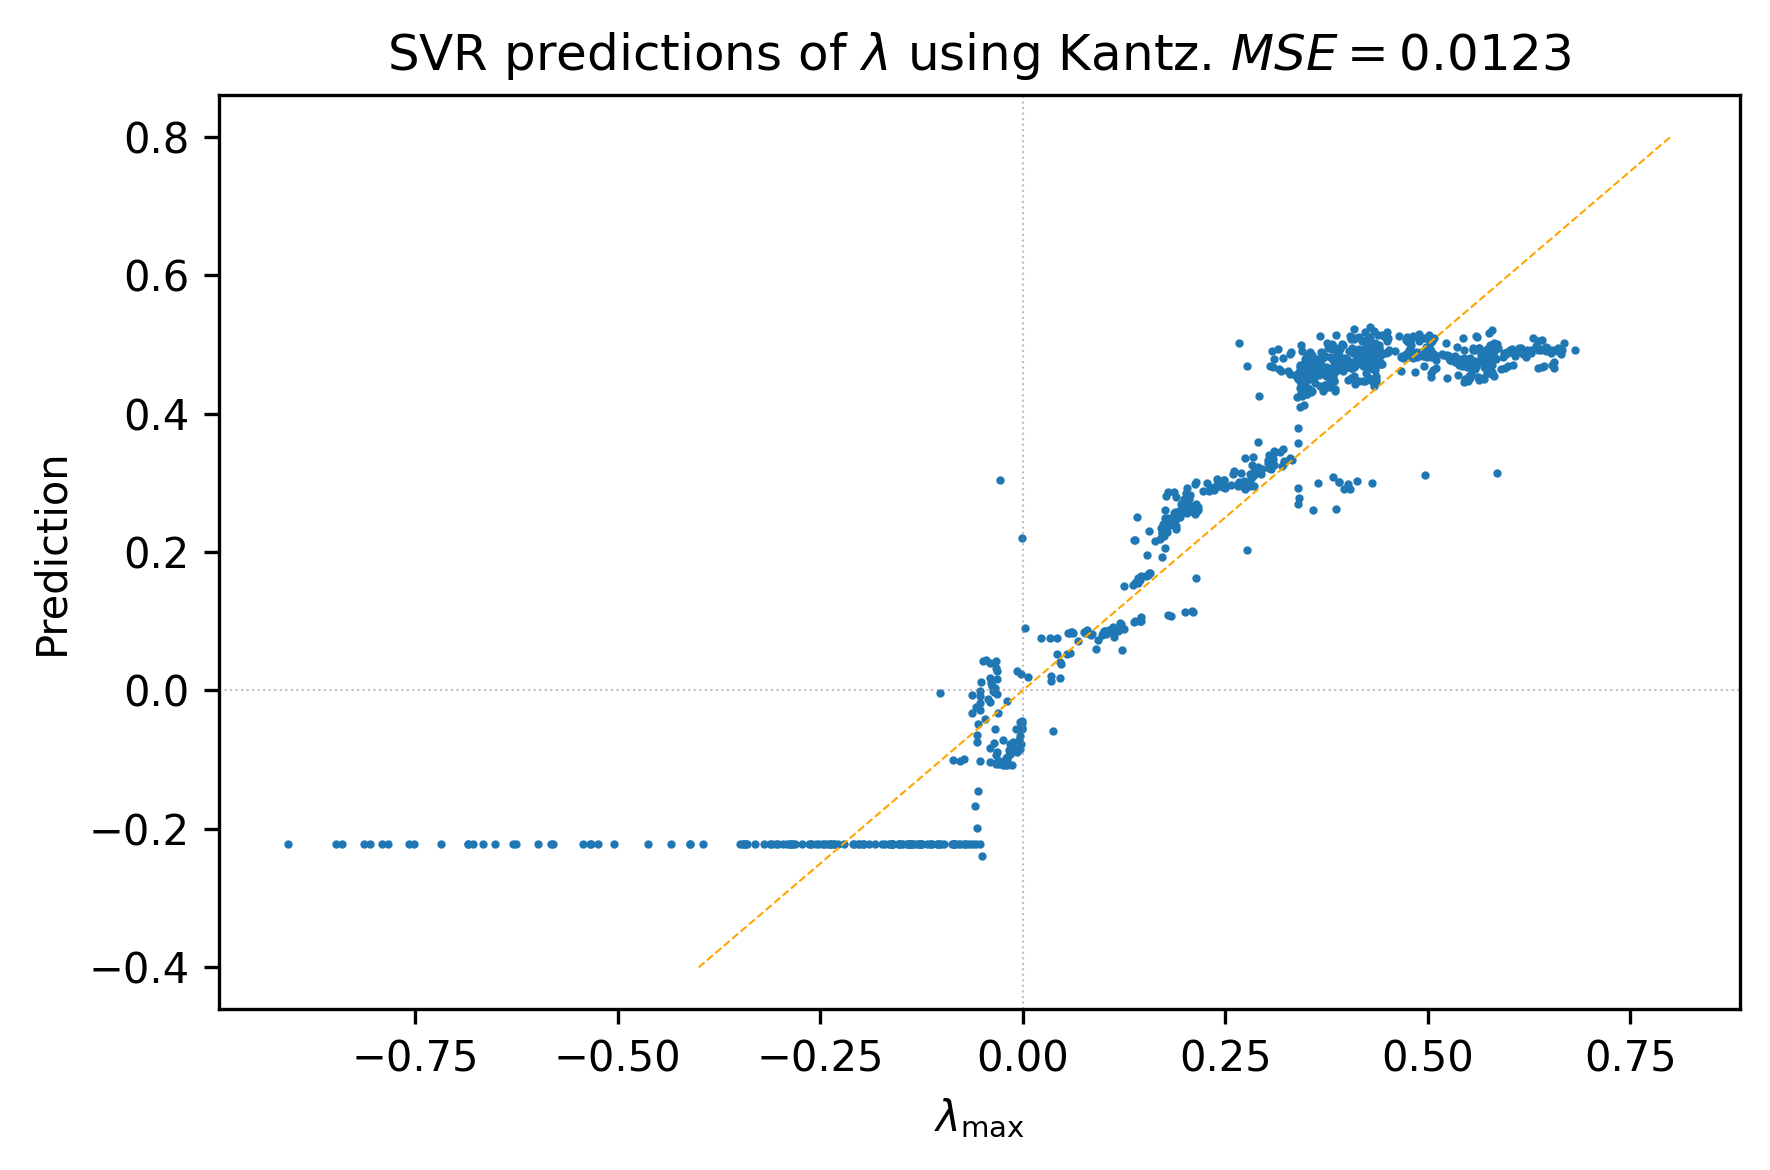

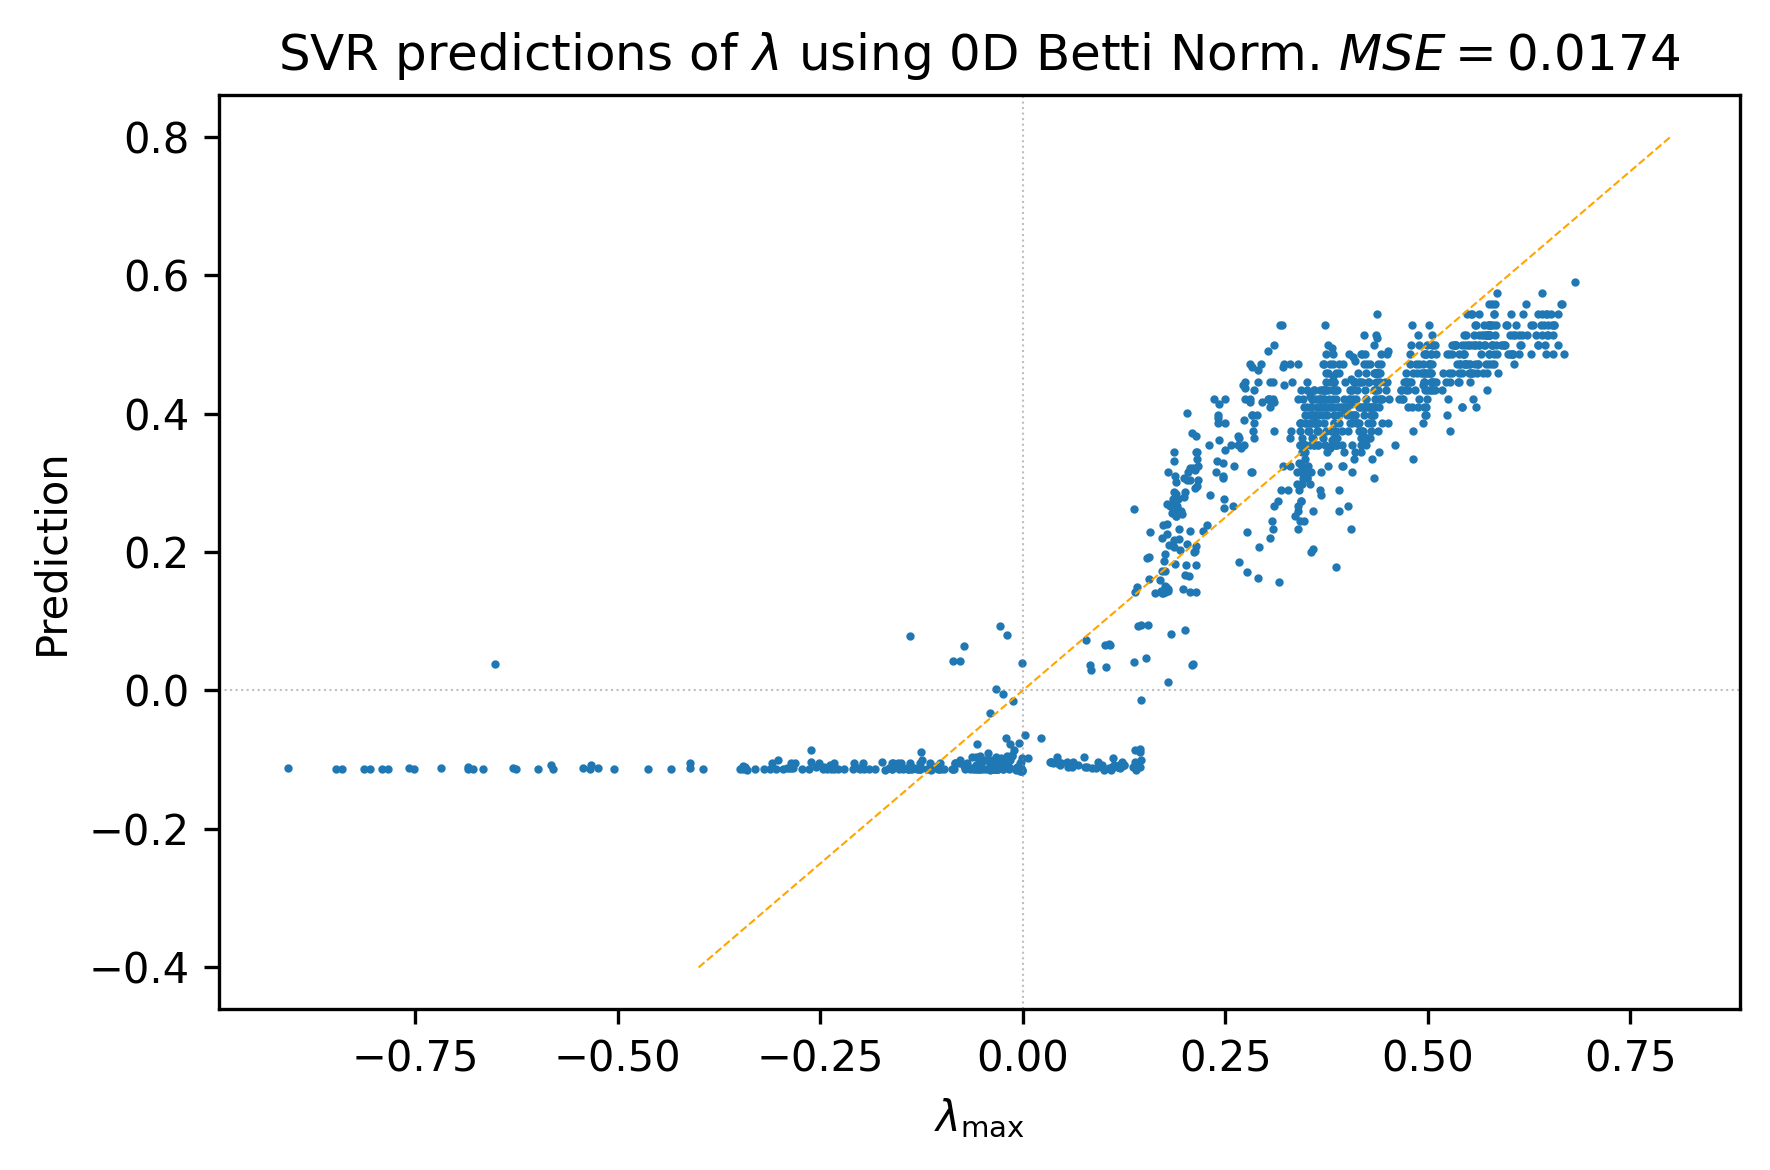

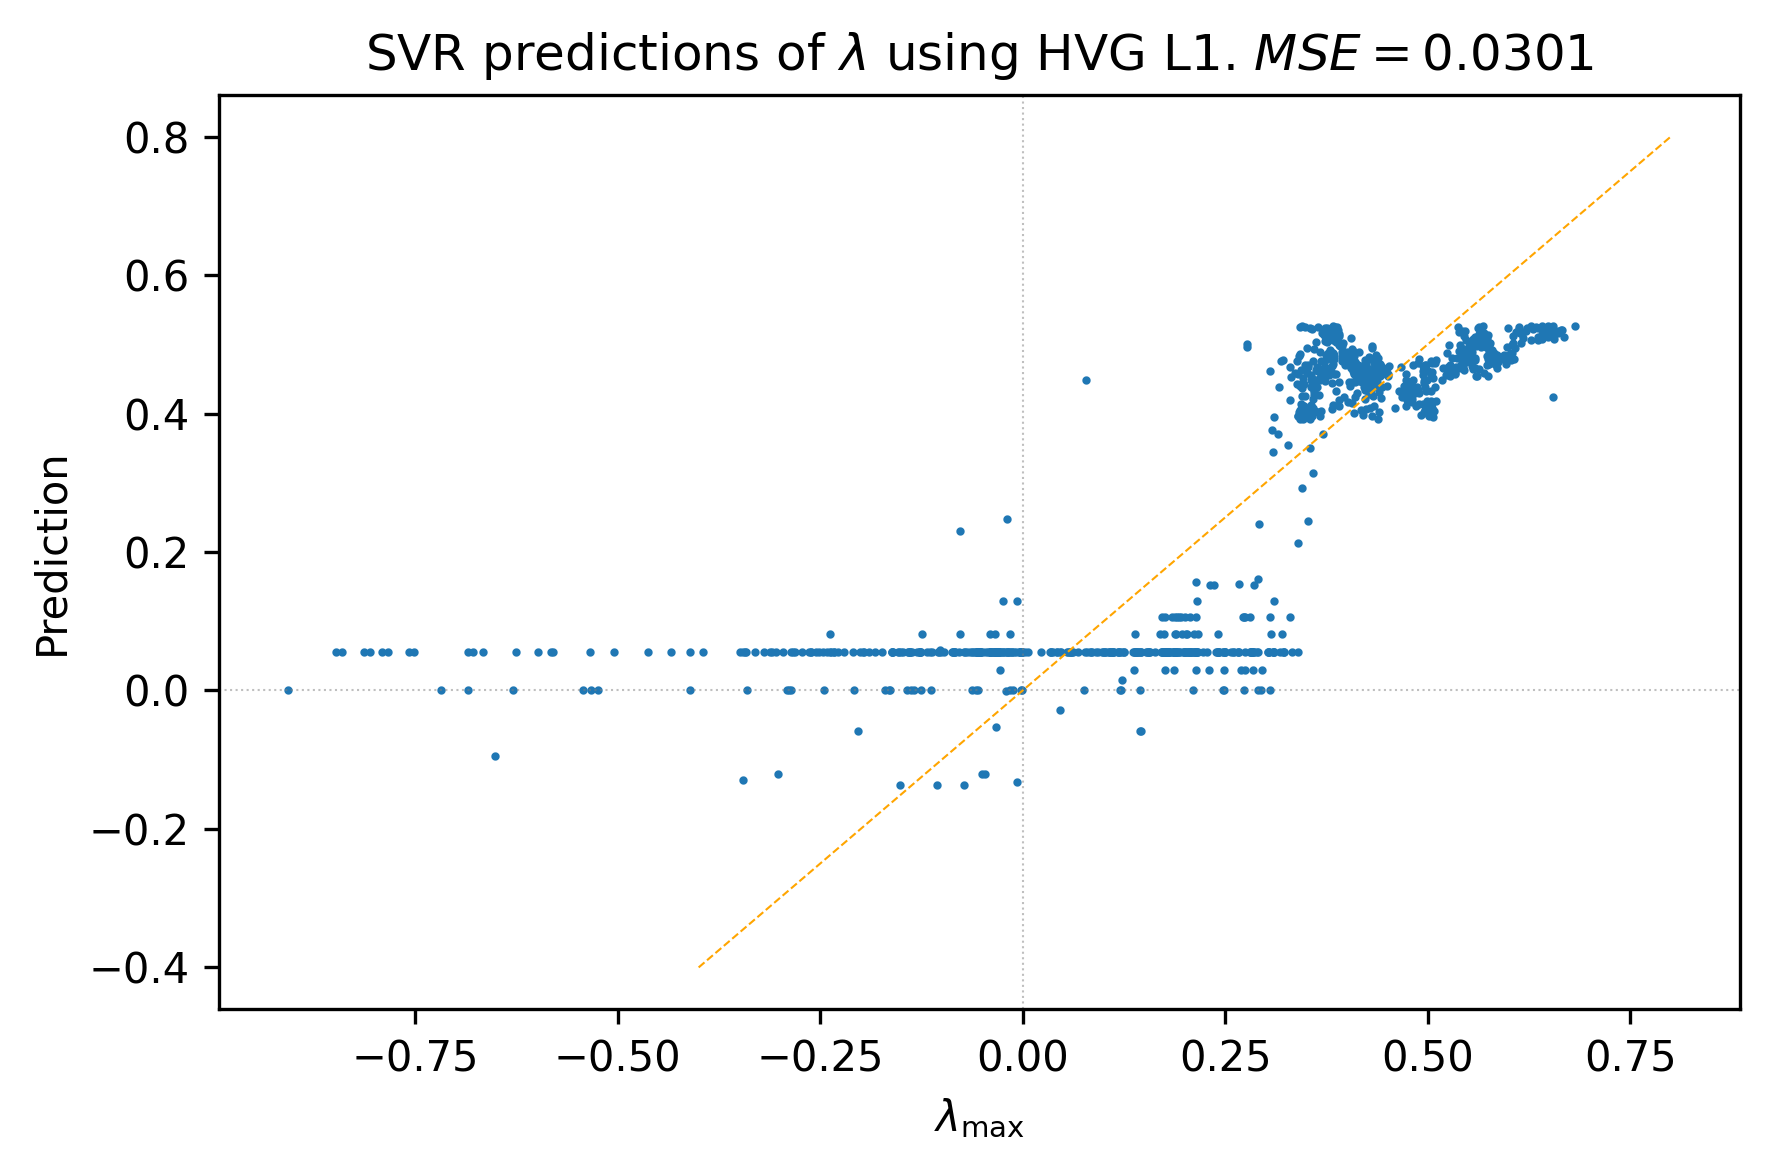

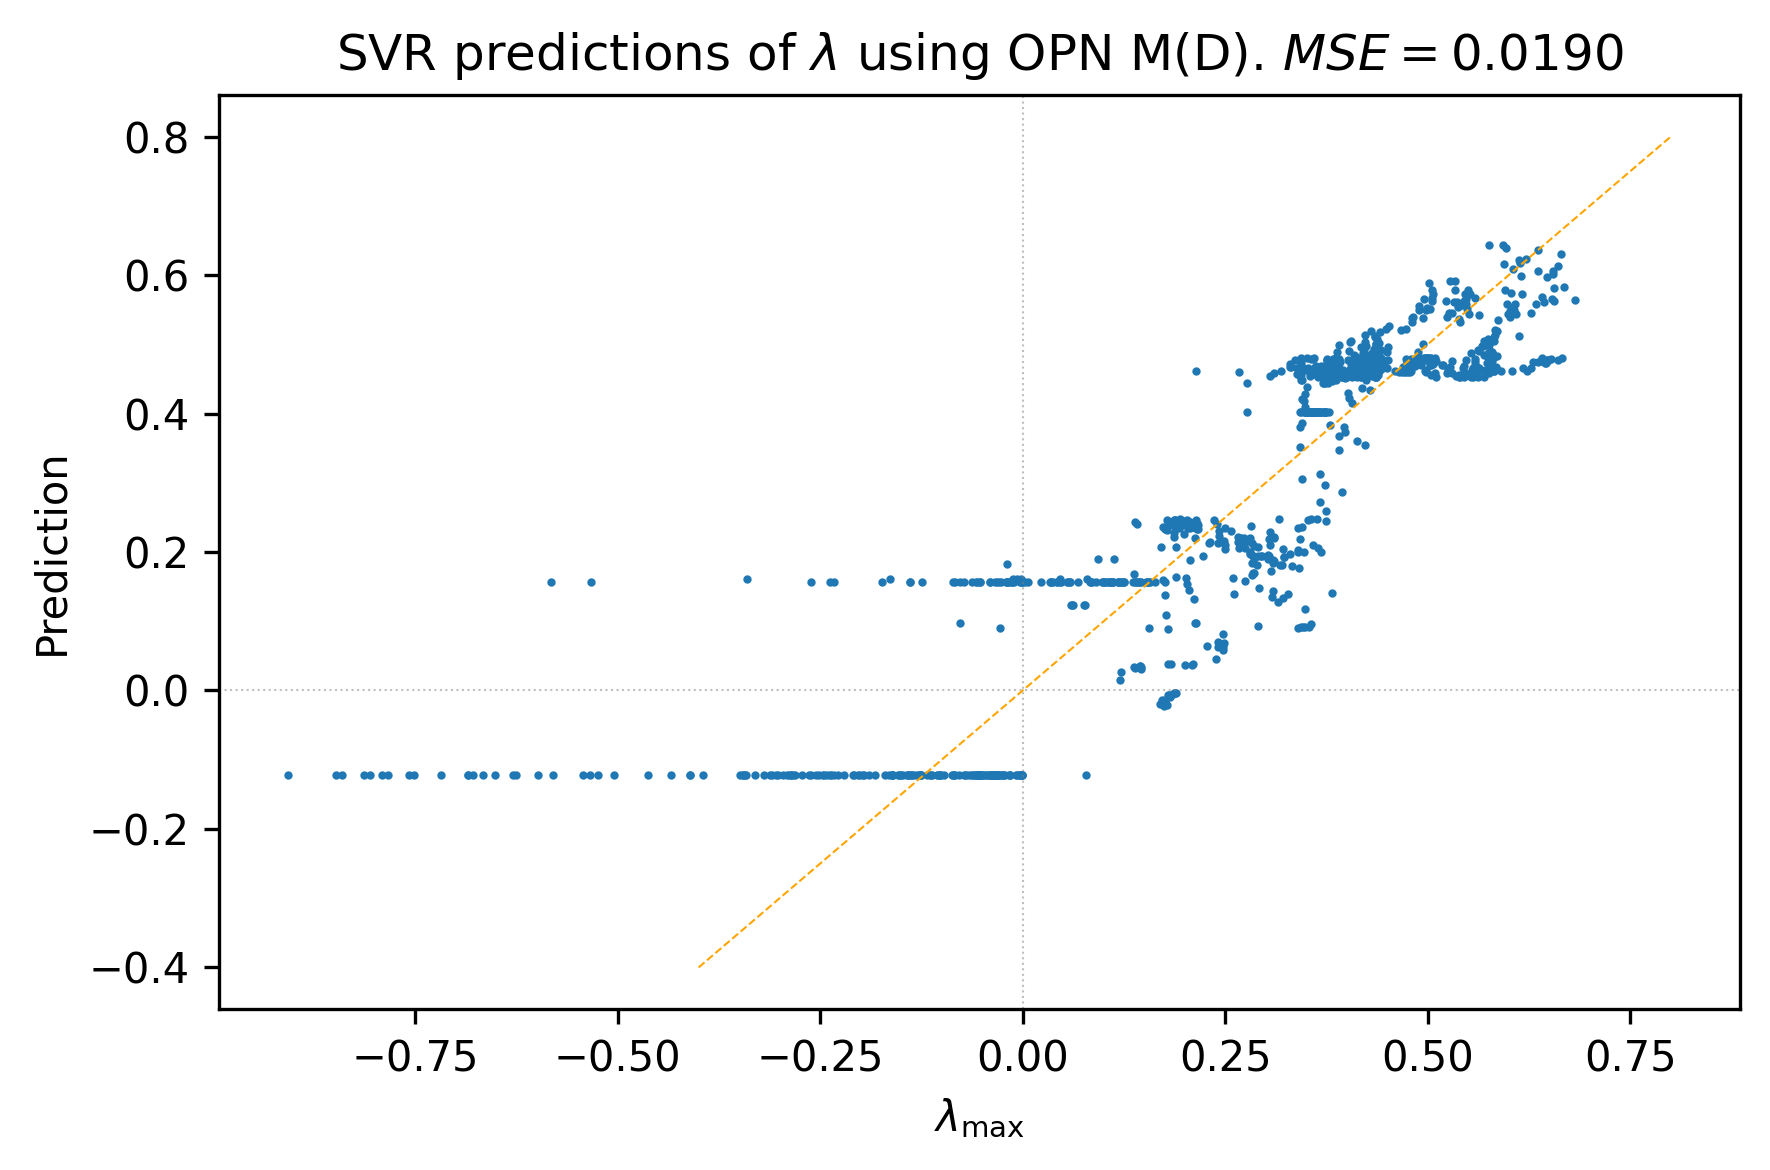

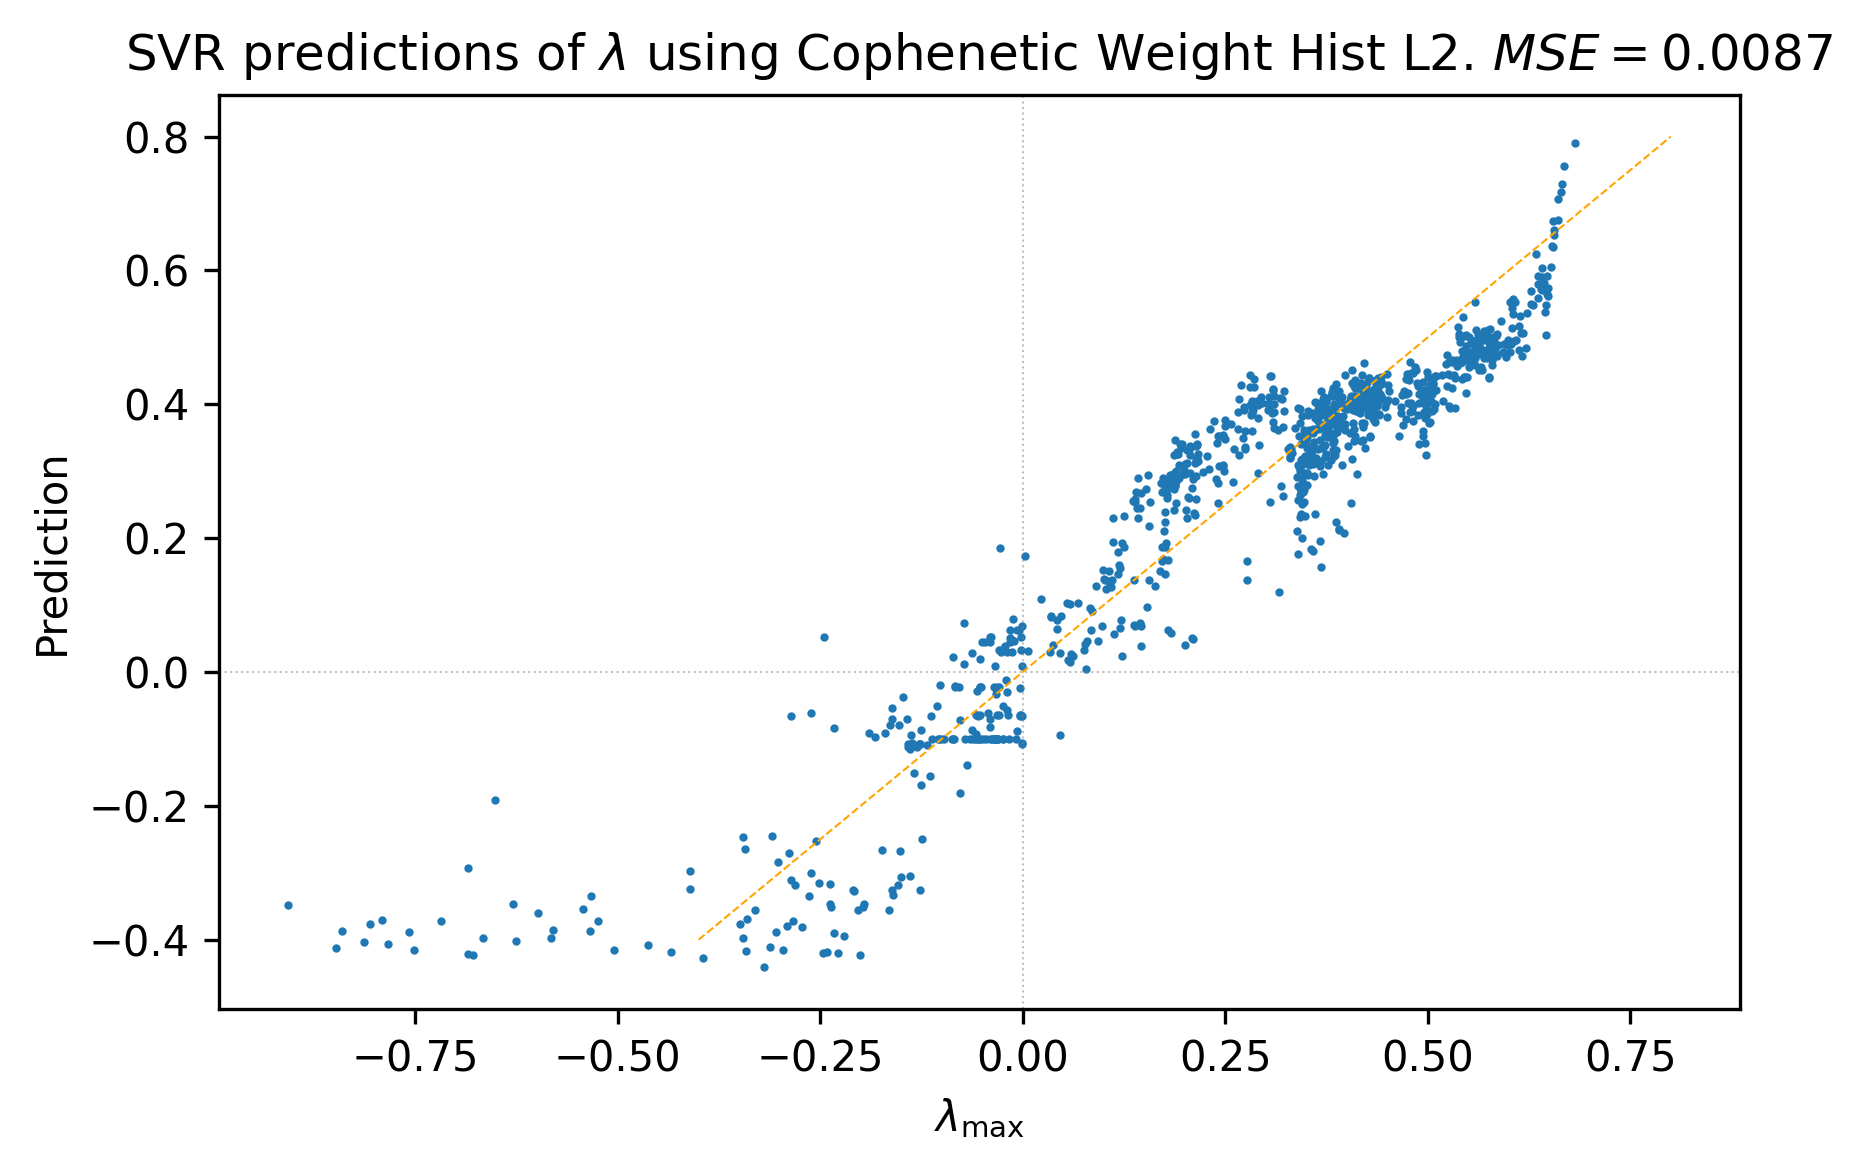

In [448]:

for feature_type in feature_types:
    # feature_type = "hvg"
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
    y_pred_R = features_and_predictions[feature_type]["pR"]
    best_feature_name_R = features_and_predictions[feature_type]["bR"]
    best_feature_model_R = features_and_predictions[feature_type]["bRm"]
    mse = mean_squared_error(y_true, y_pred_R)
    ax1.scatter(y_true, y_pred_R, s=1)
    ax1.set_xlabel("$\lambda_{\max}$")
    ax1.set_ylabel("Prediction")
    ax1.axhline(0, c="gray", lw=0.5, ls=":", alpha=0.5)
    ax1.axvline(0, c="gray", lw=0.5, ls=":", alpha=0.5)
    ax1.plot([-.4,.8],[-.4,.8], lw=0.5, ls="--", c="orange", label="$x=y$")
    ax1.set_title(f"{best_feature_model_R} predictions of $\lambda$ using {best_feature_name_R}. $MSE={mse:.4f}$")

    fig.tight_layout()
    plt.savefig(f"outputs/figures/white_noise/{feature_type}_scatter.pdf", dpi=300)
    plt.show()

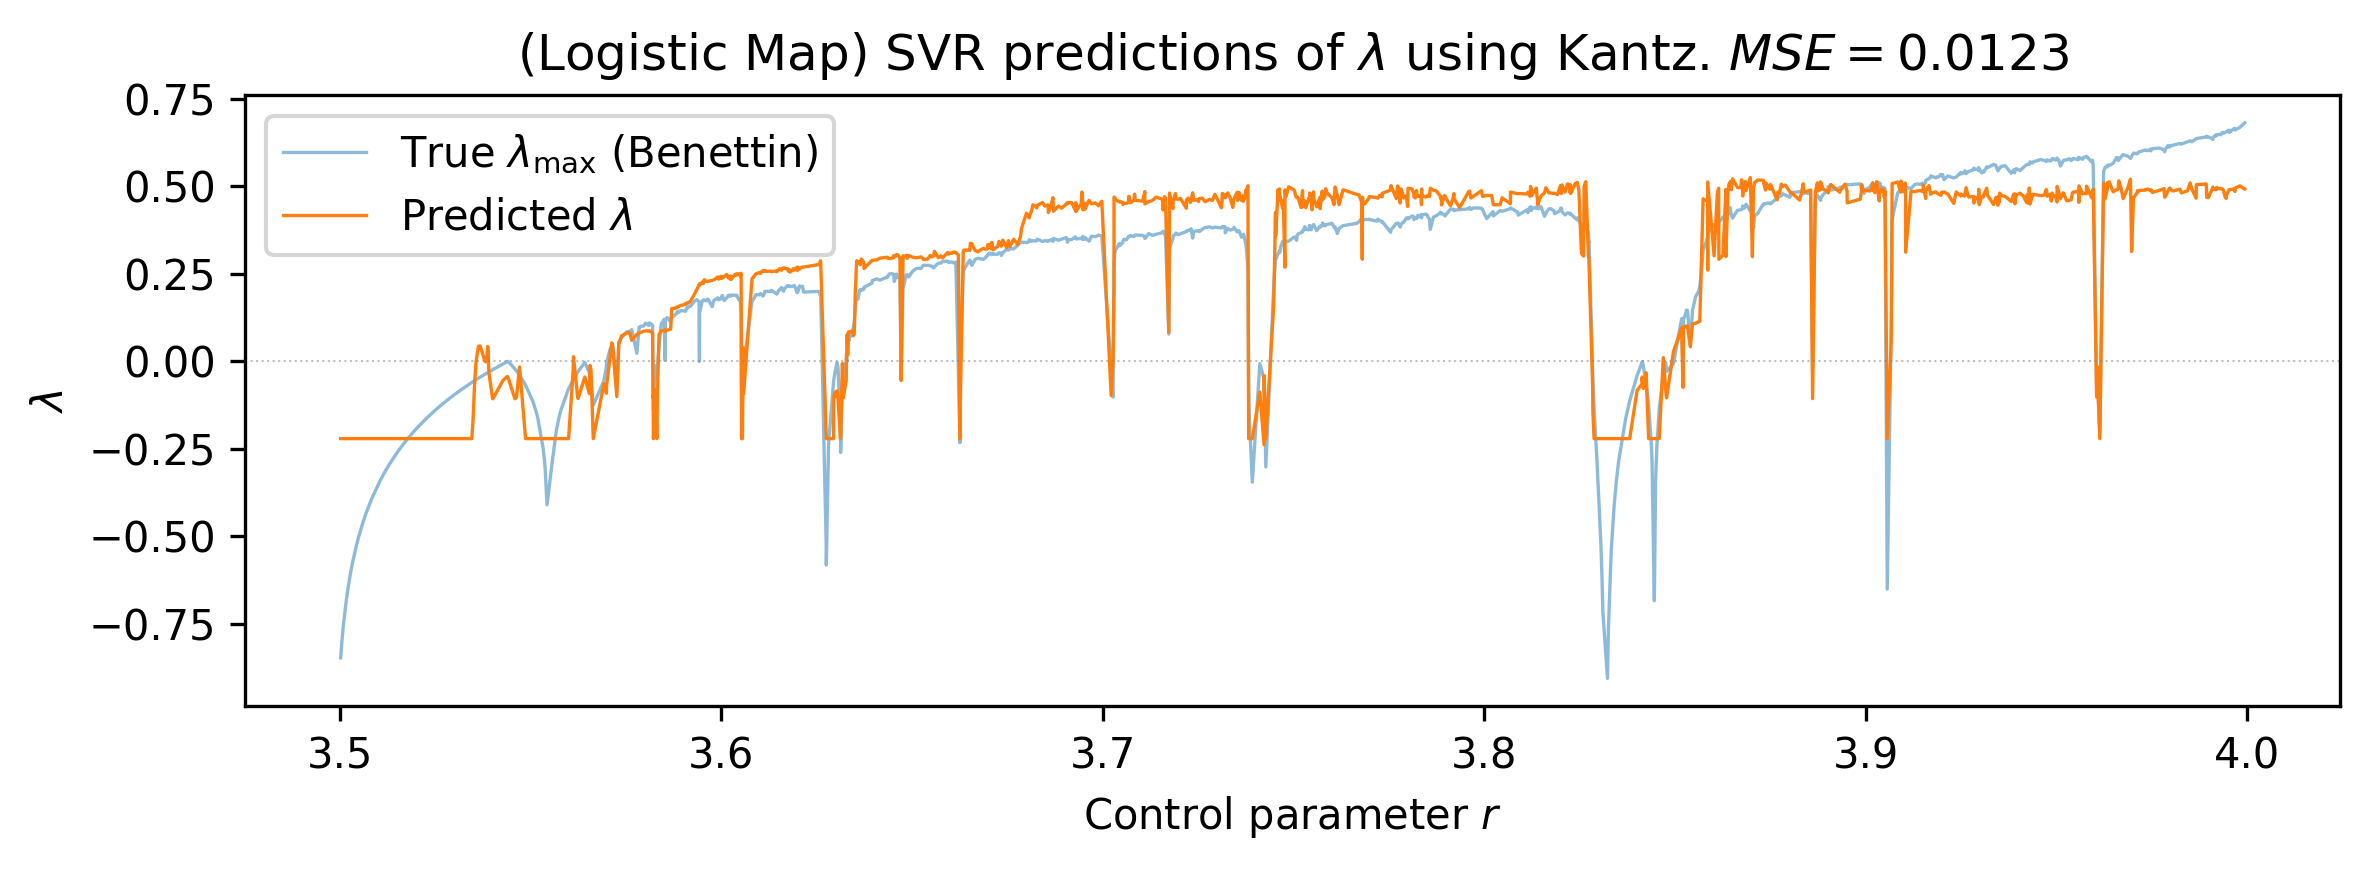

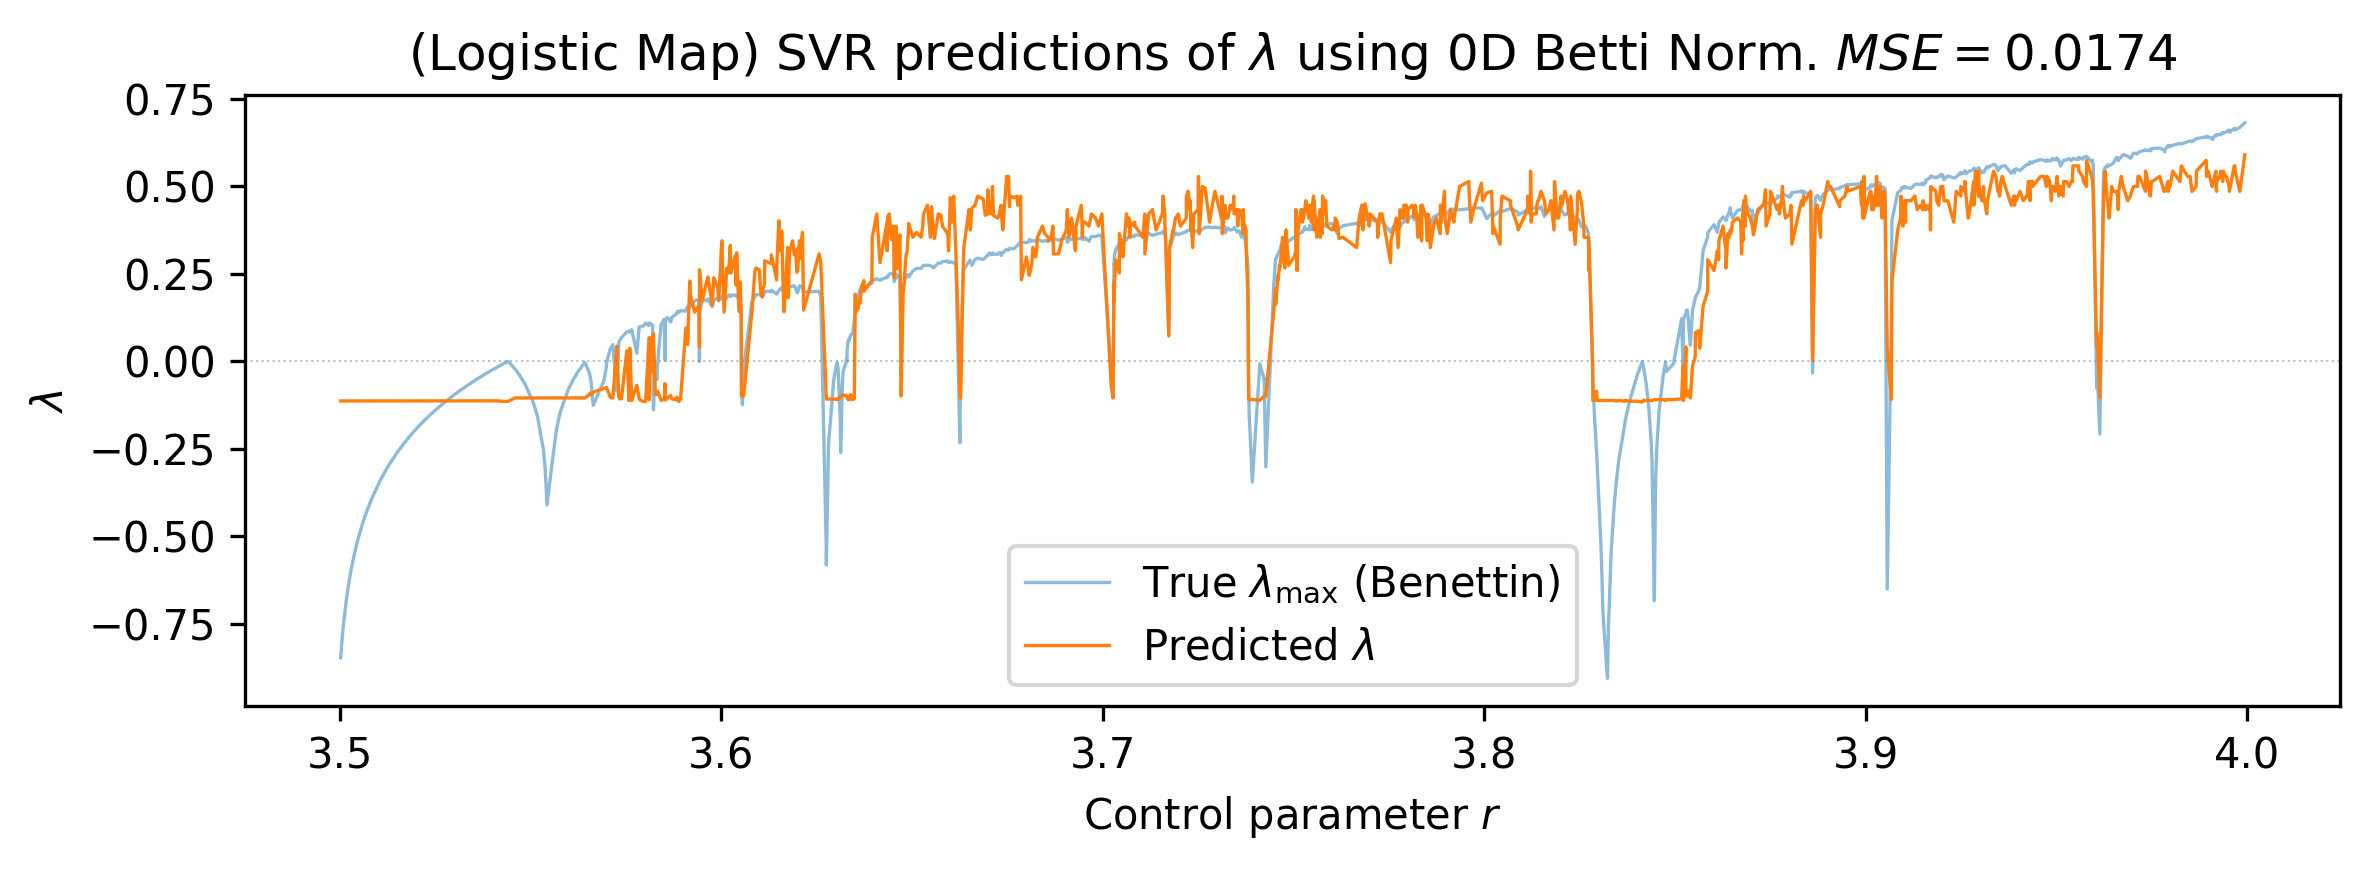

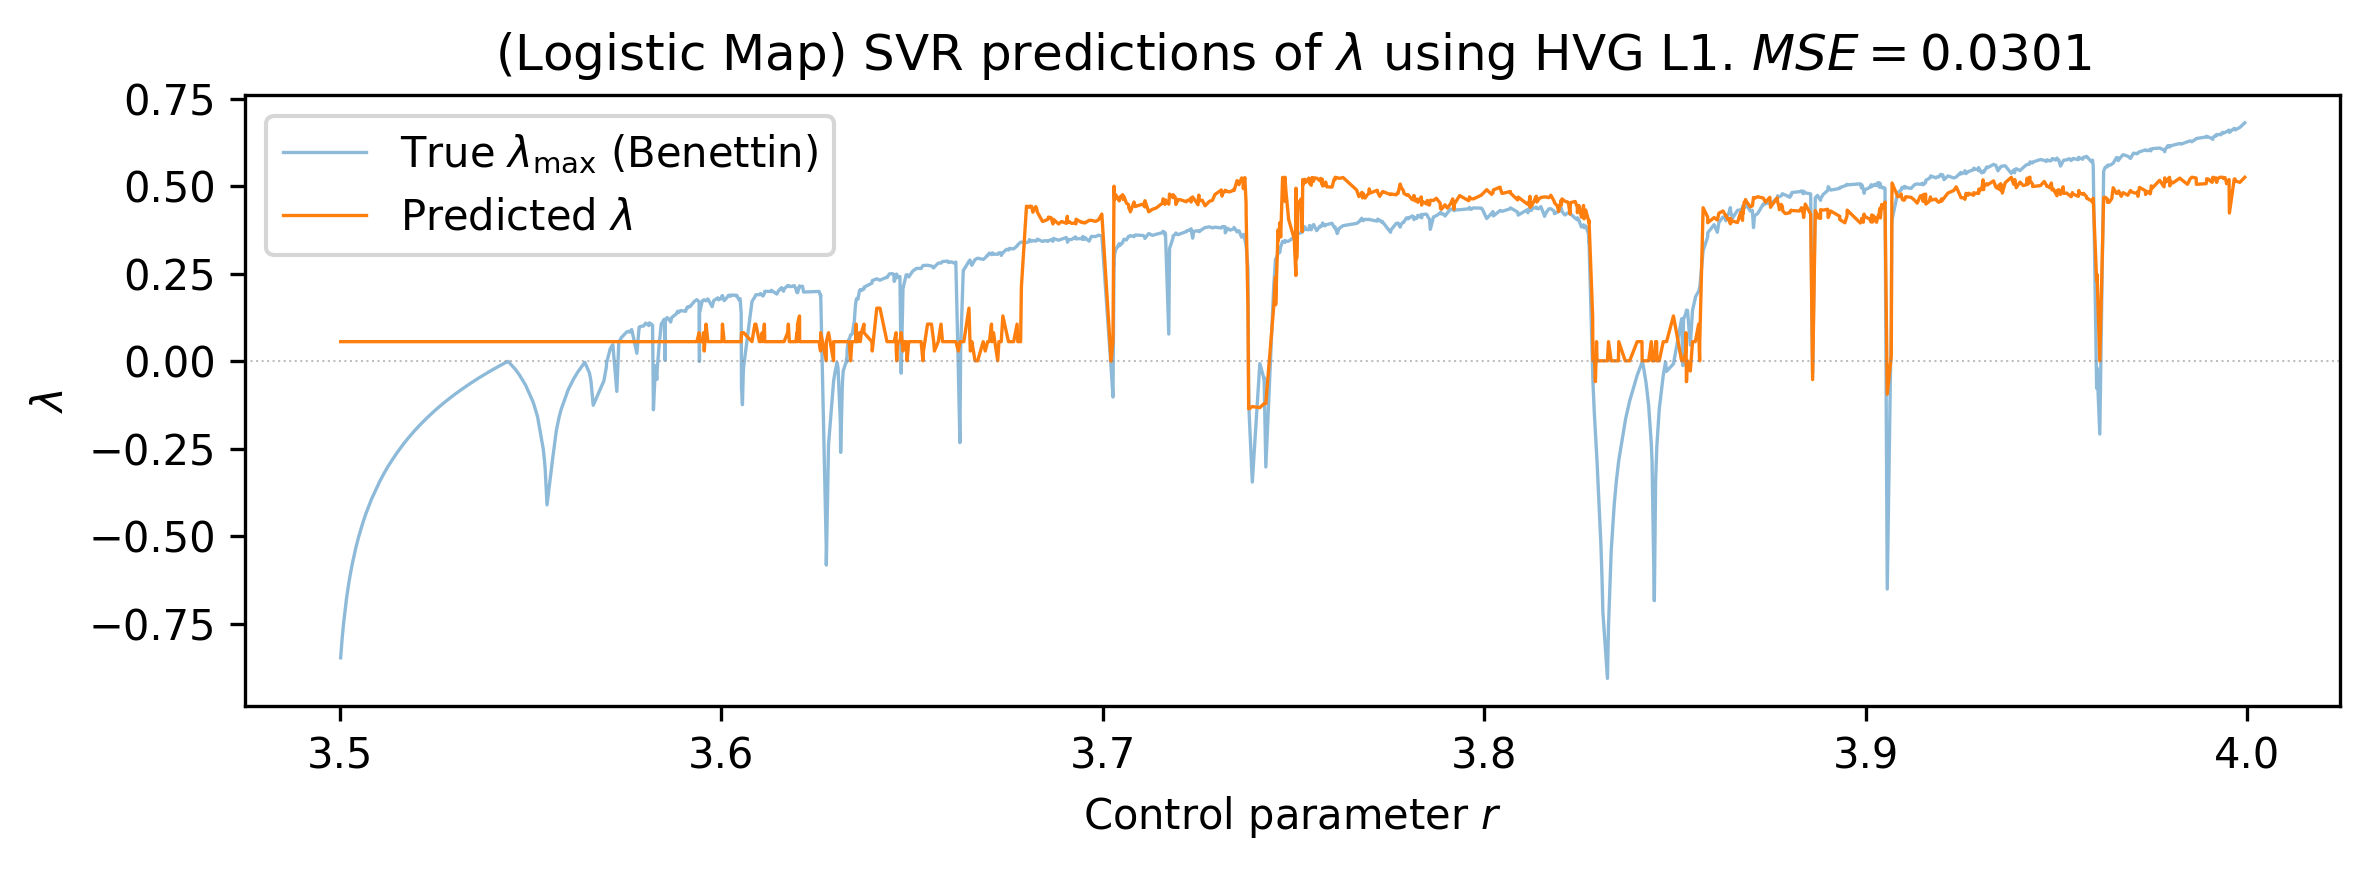

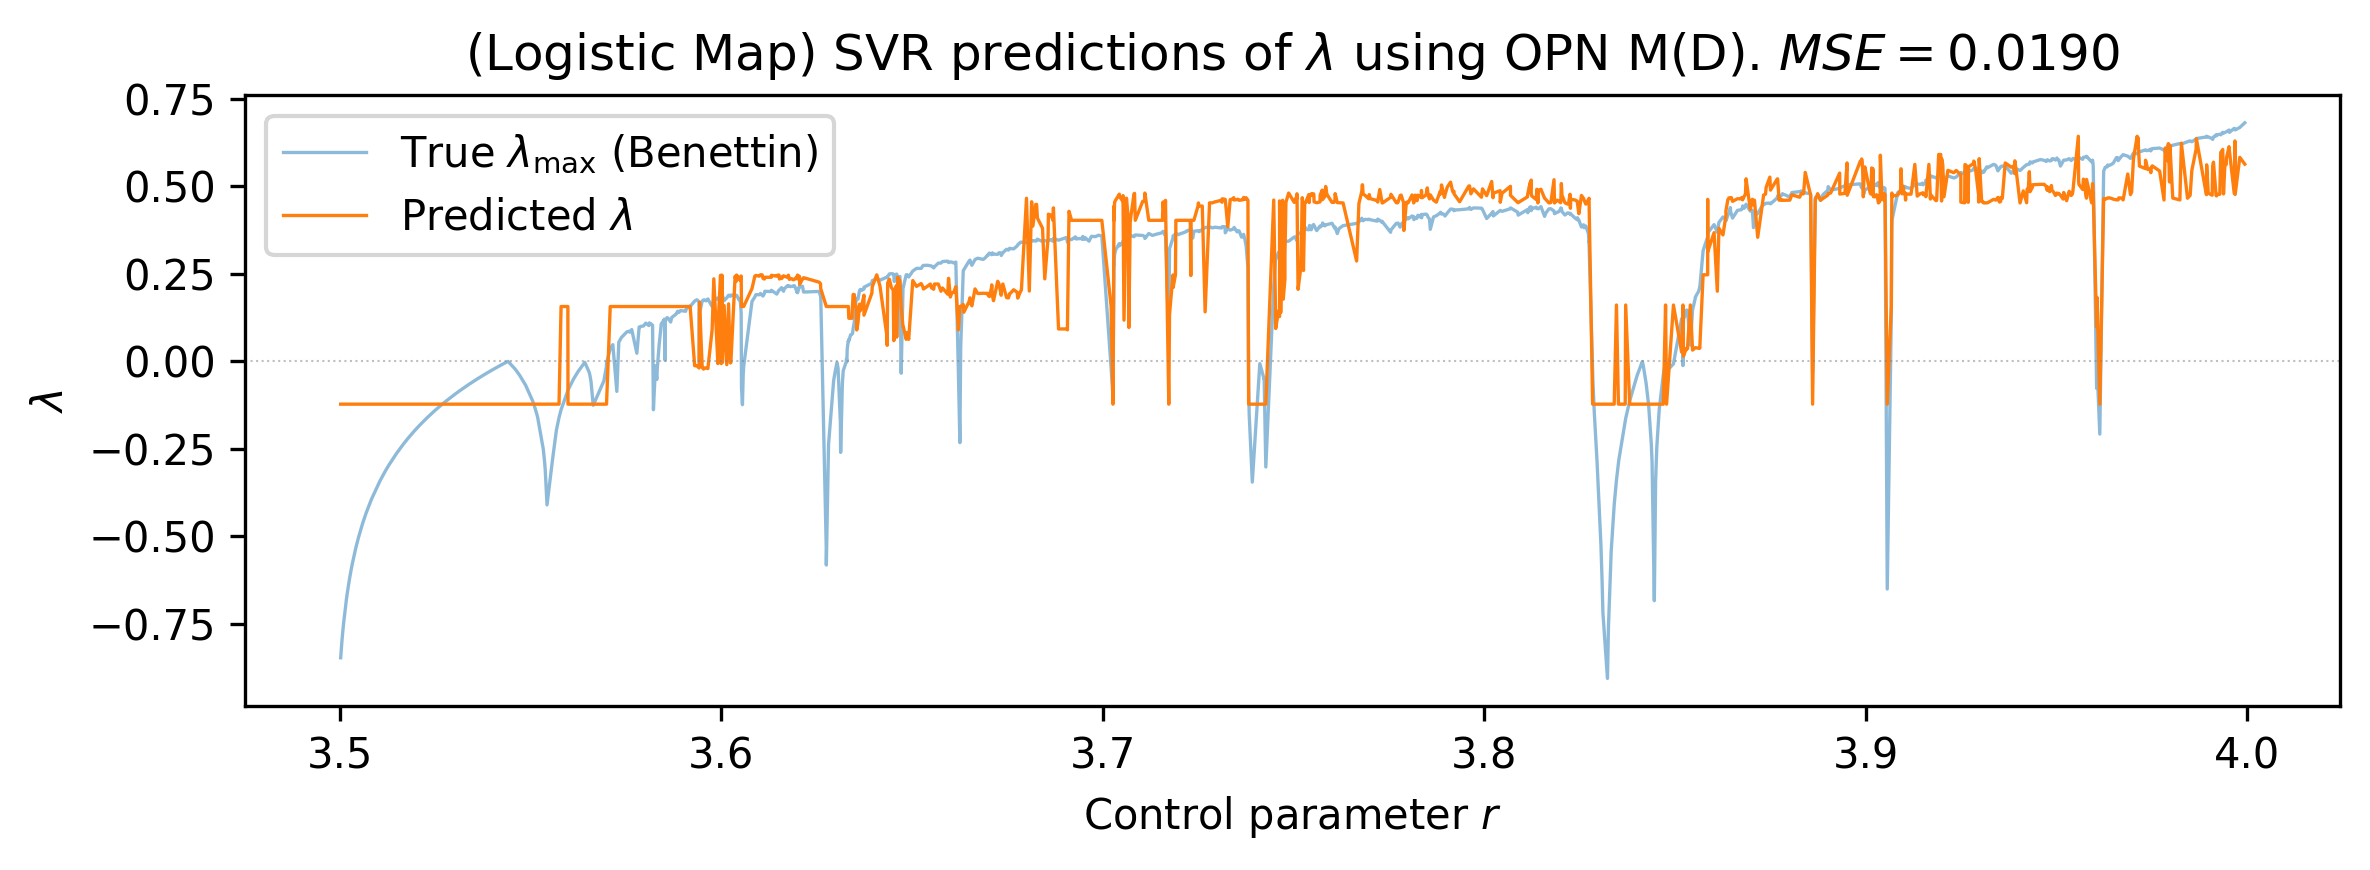

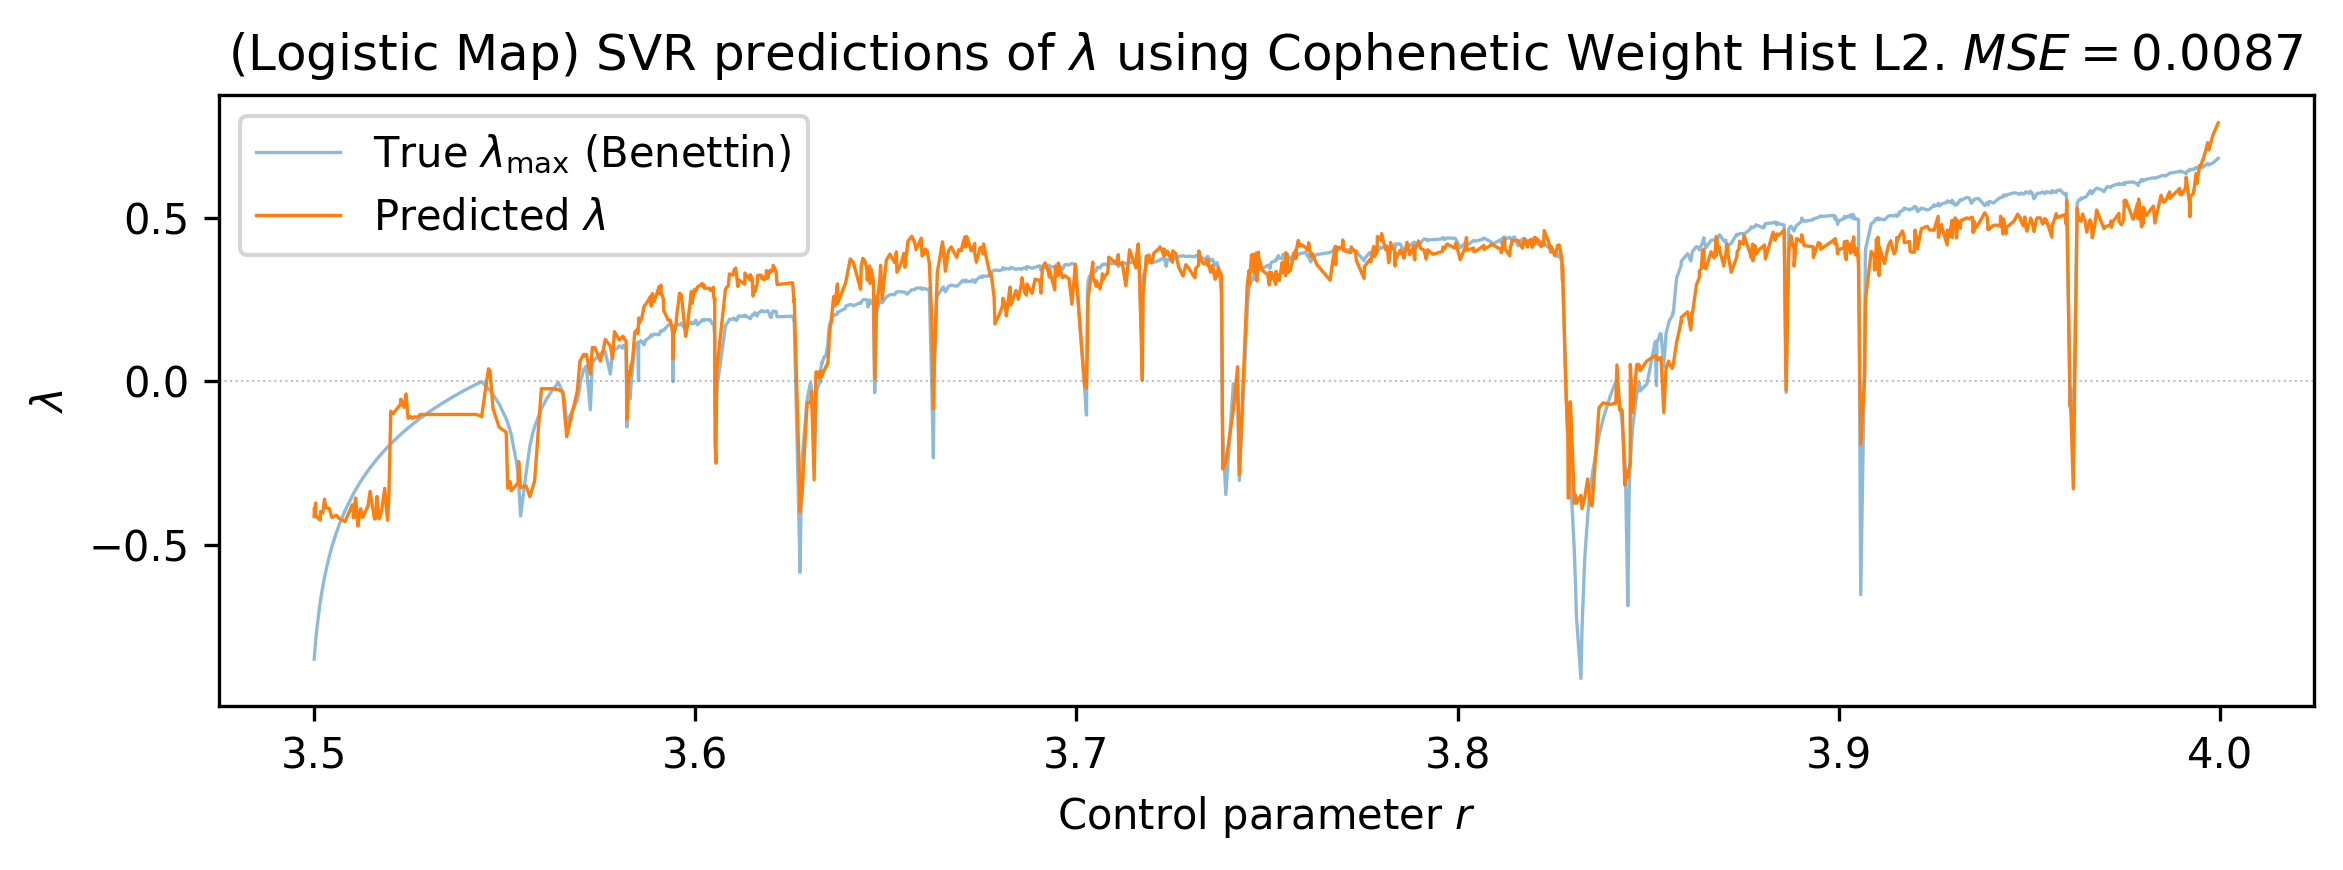

In [457]:

for feature_type in feature_types:
    # feature_type = "hvg"
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3), dpi=300)
    y_pred_R = features_and_predictions[feature_type]["pR"]
    best_feature_name_R = features_and_predictions[feature_type]["bR"]
    best_feature_model_R = features_and_predictions[feature_type]["bRm"]
    mse = mean_squared_error(y_true, y_pred_R)
    ax1.plot(y_params, y_true, lw=0.8, label=r"True $\lambda_{\max}$ (Benettin)", alpha=0.5)
    ax1.plot(y_params, y_pred_R, lw=0.8, label="Predicted $\lambda$")
    ax1.set_xlabel("Control parameter $r$")
    ax1.set_ylabel("$\lambda$")
    ax1.axhline(0, c="gray", lw=0.5, ls=":", alpha=0.5)
    ax1.set_title(f"({system.capitalize()} Map) {best_feature_model_R} predictions of $\lambda$ using {best_feature_name_R}. $MSE={mse:.4f}$")
    ax1.legend()
    fig.tight_layout()
    plt.savefig(f"outputs/figures/white_noise/{feature_type}_predictions.pdf", dpi=300)
    plt.show()

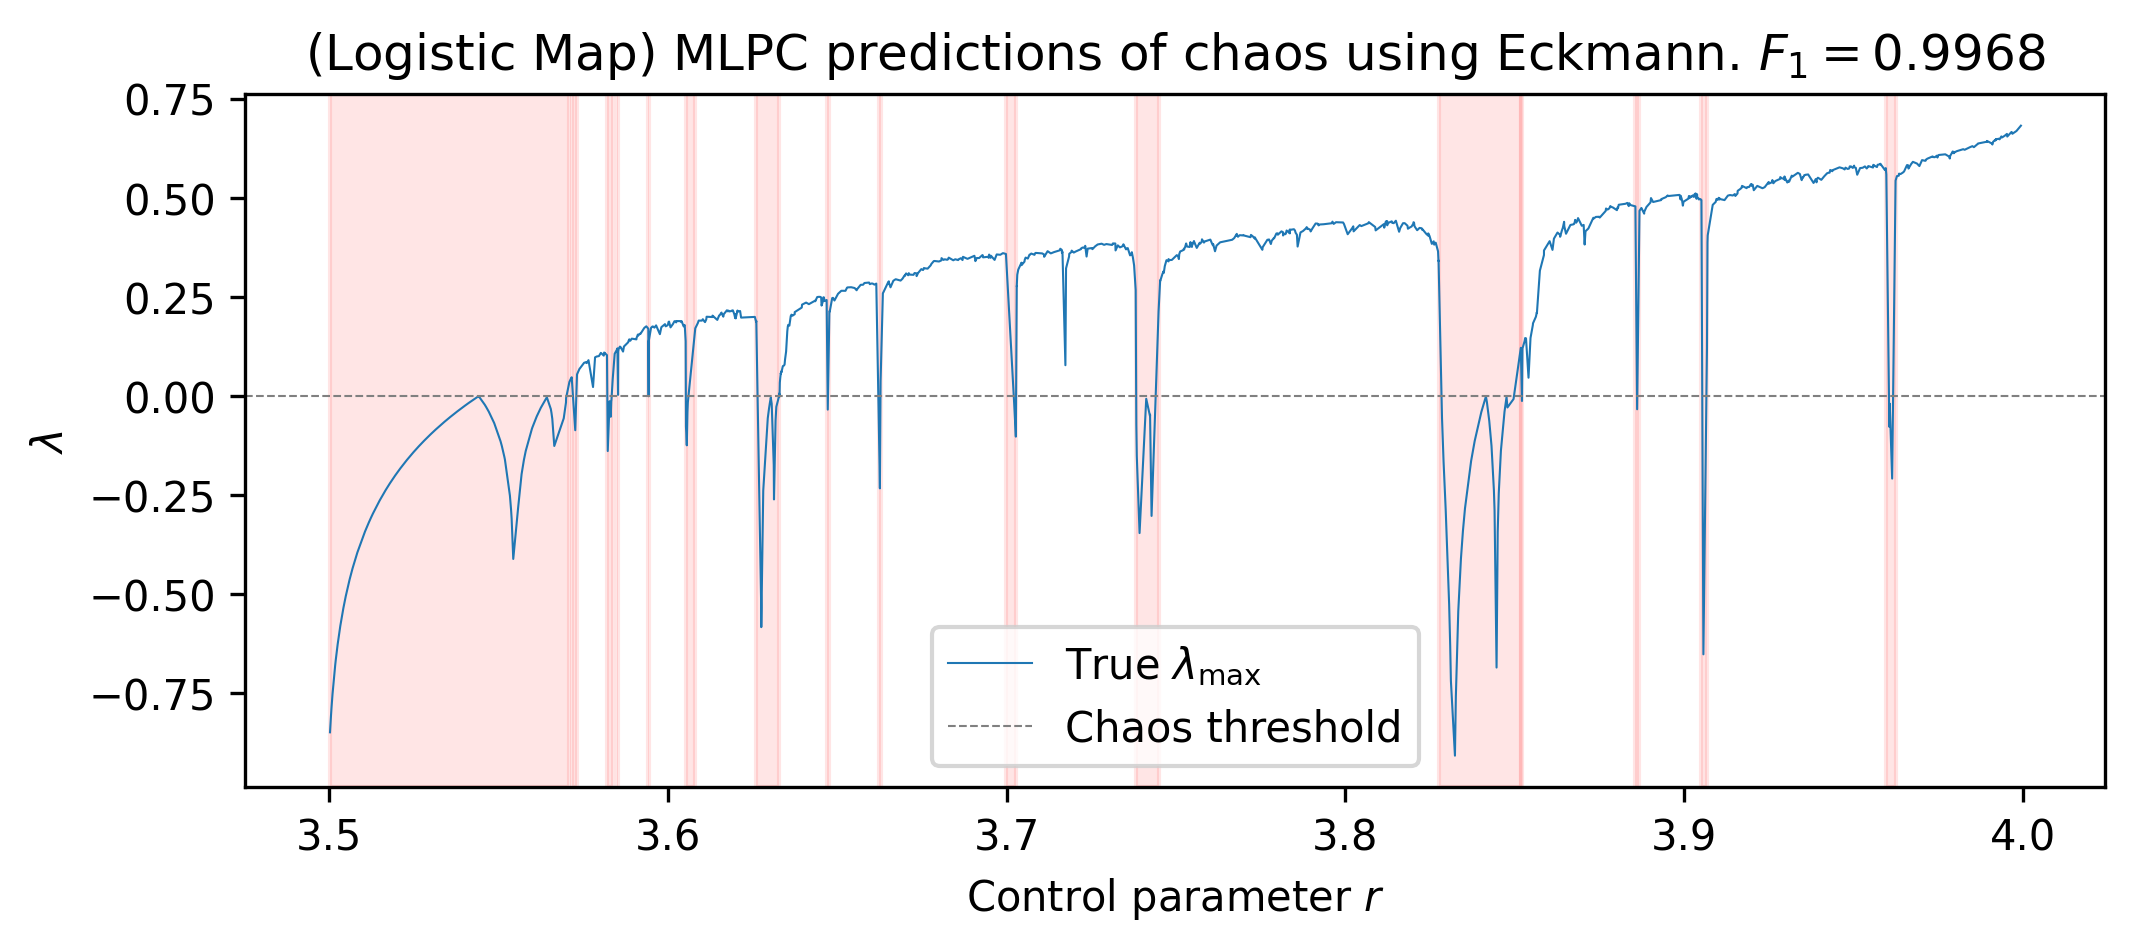

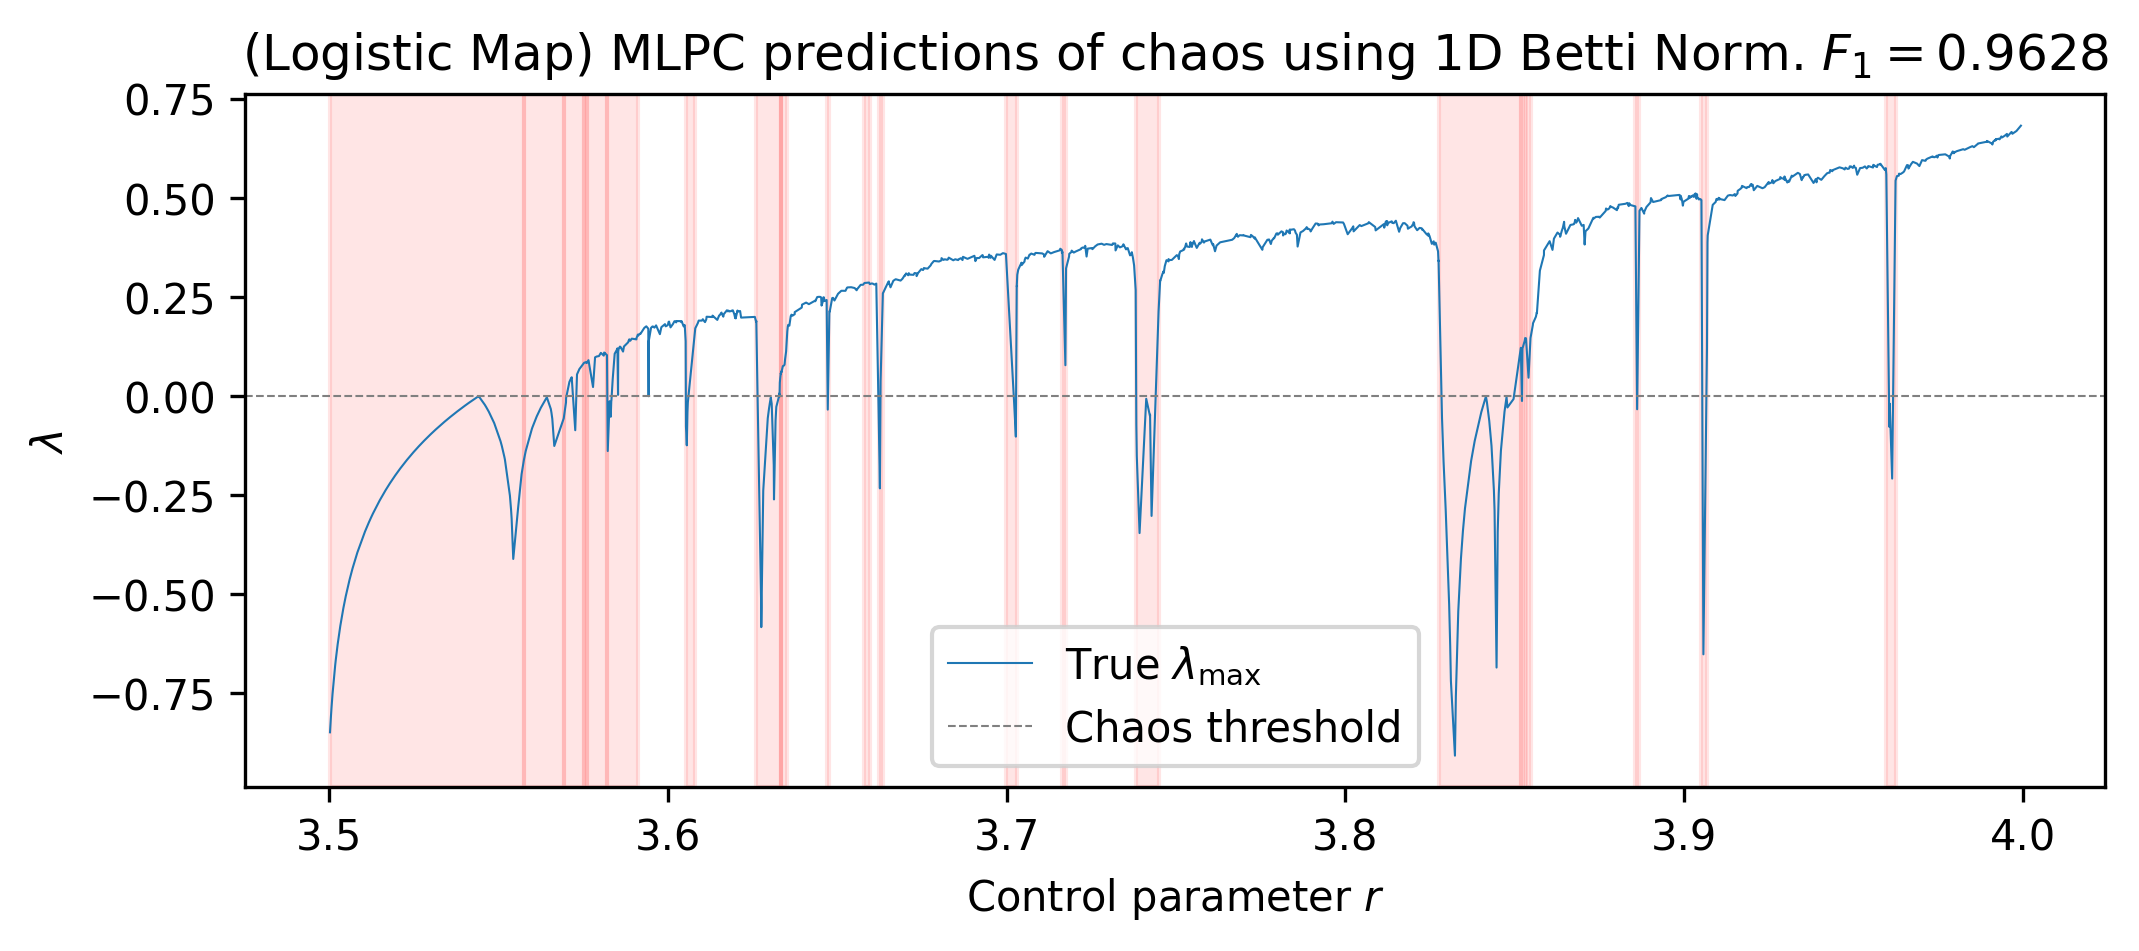

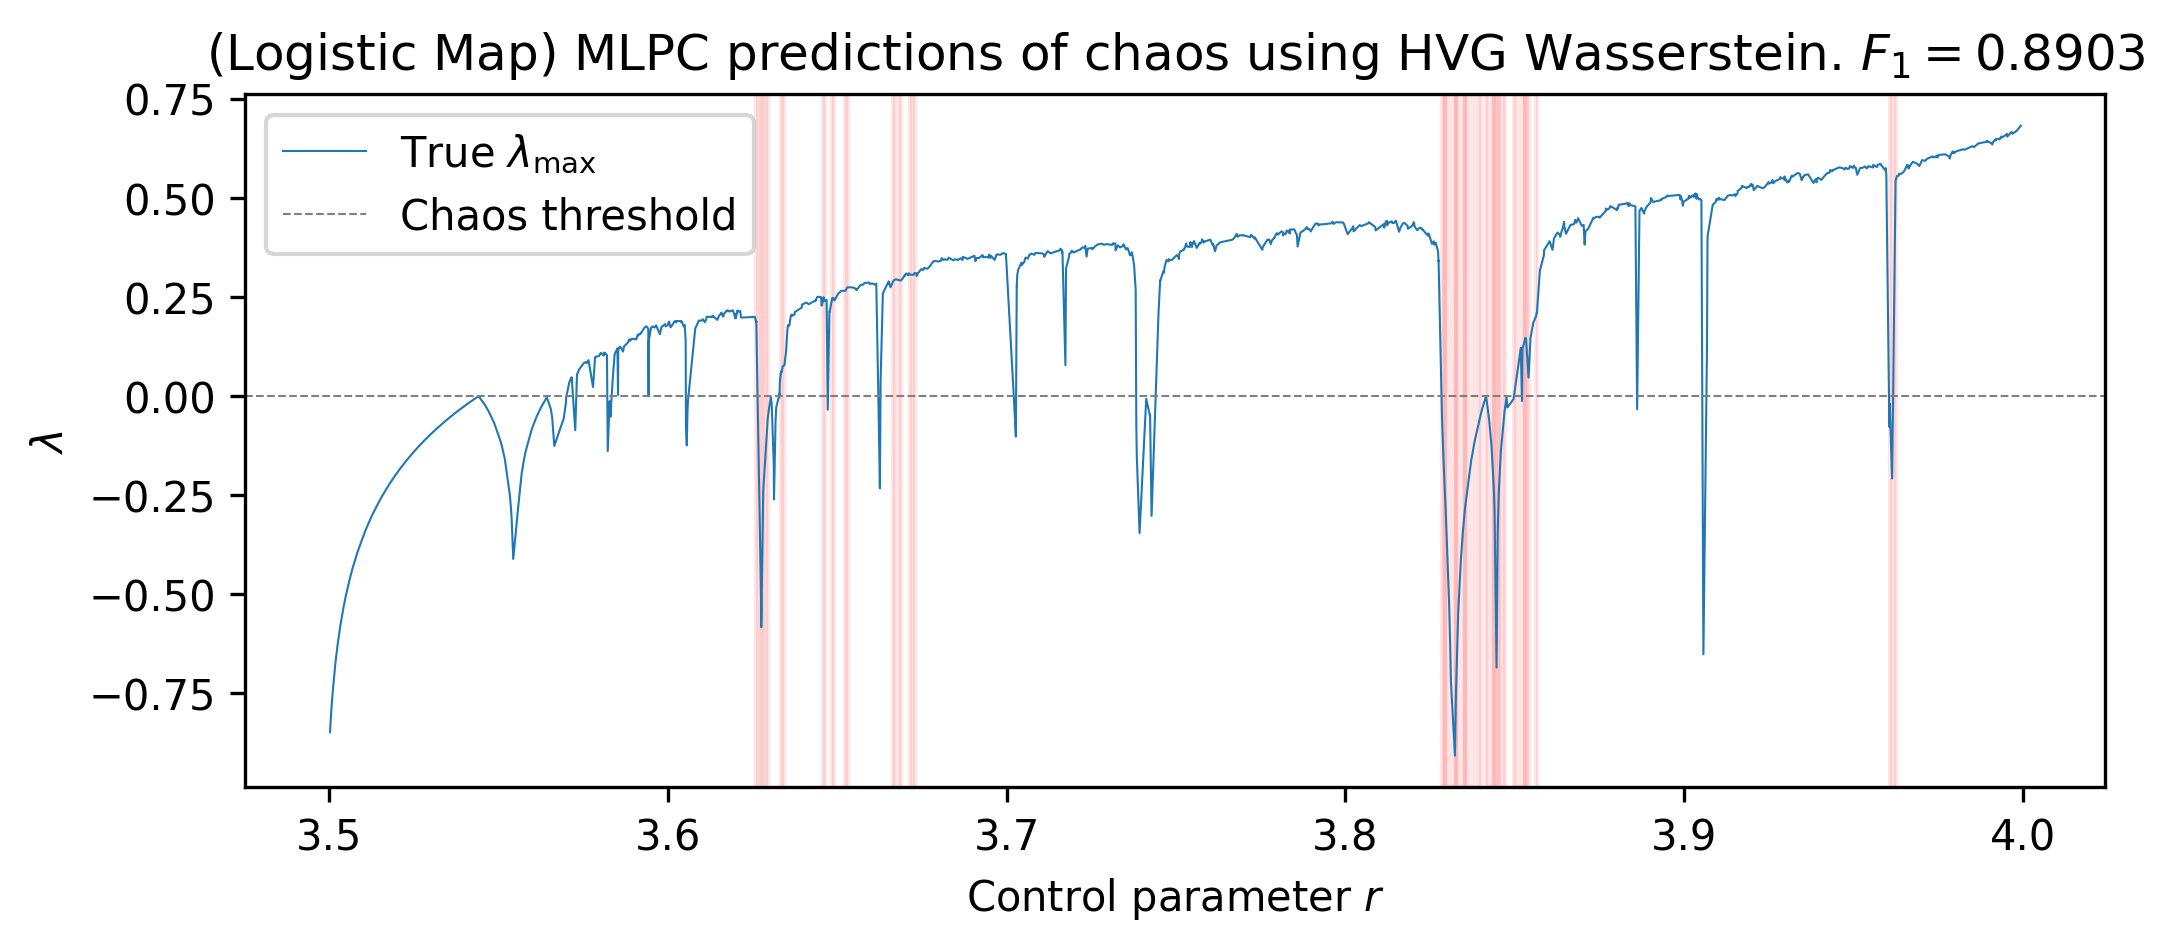

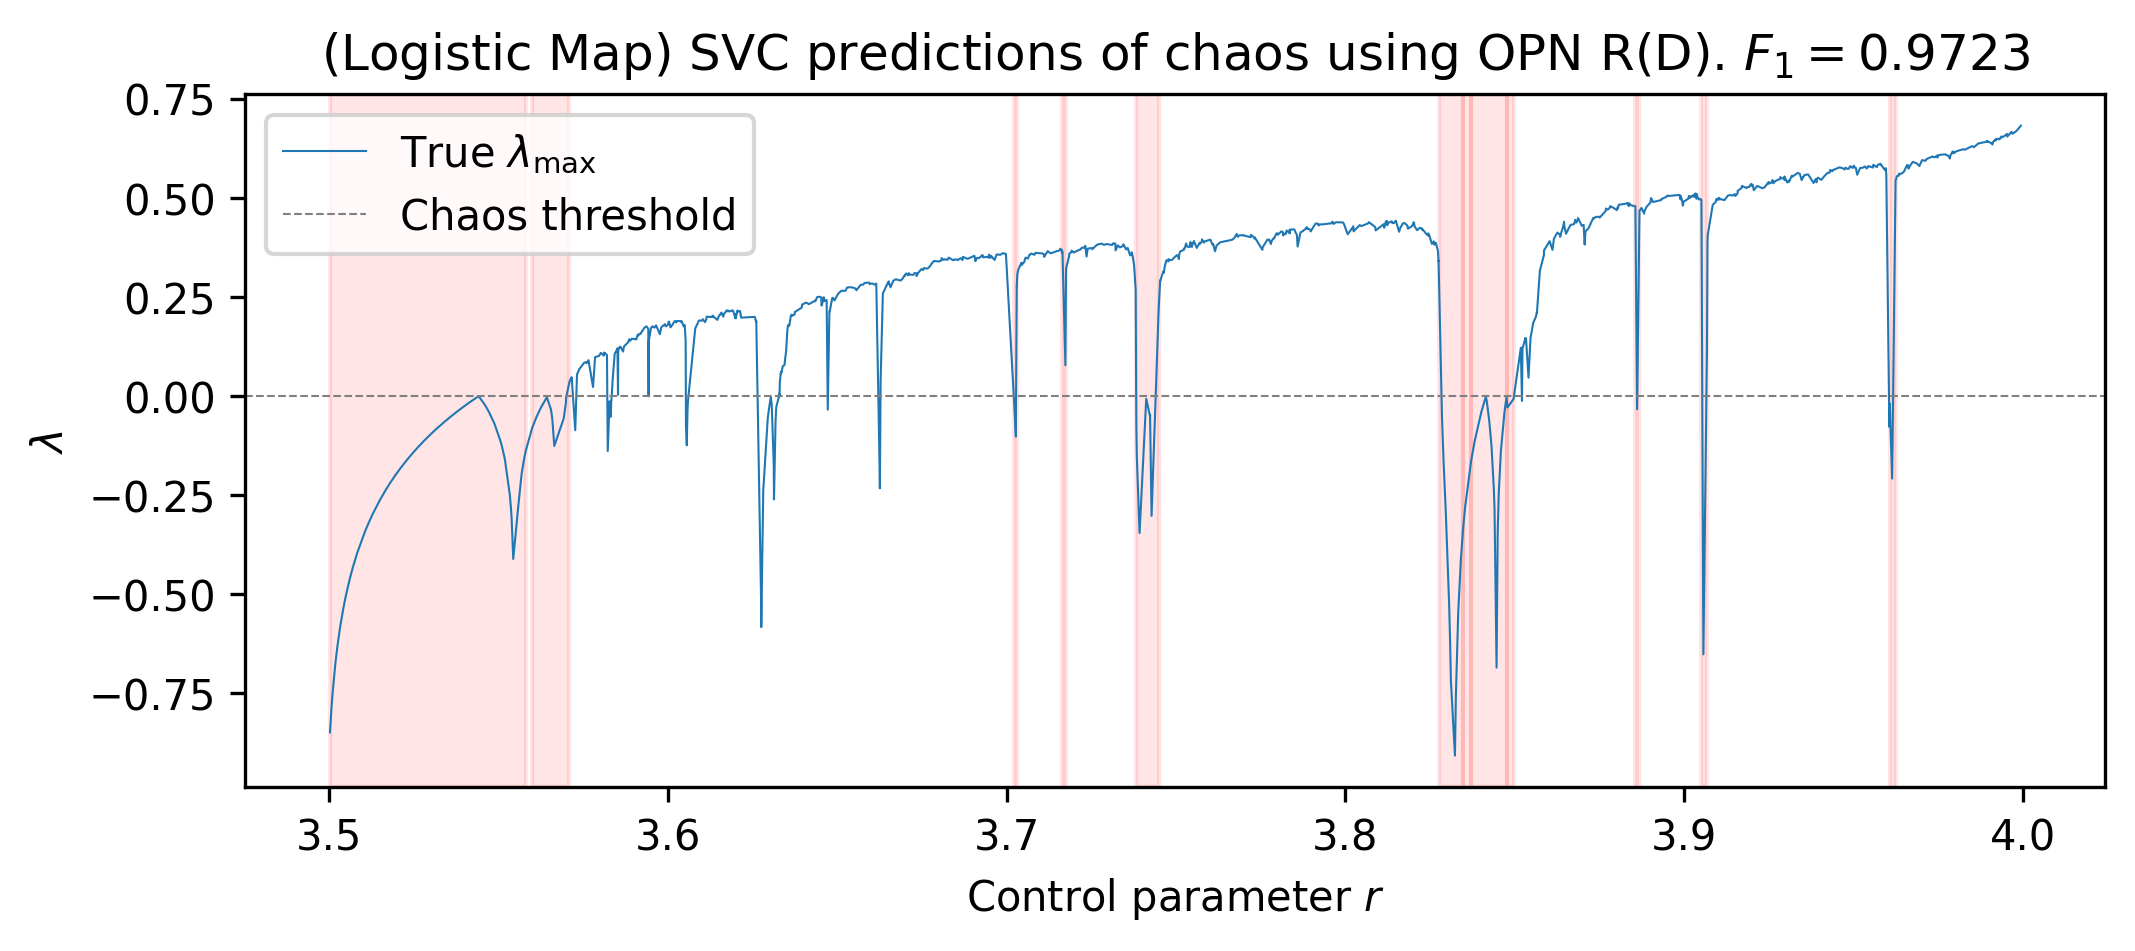

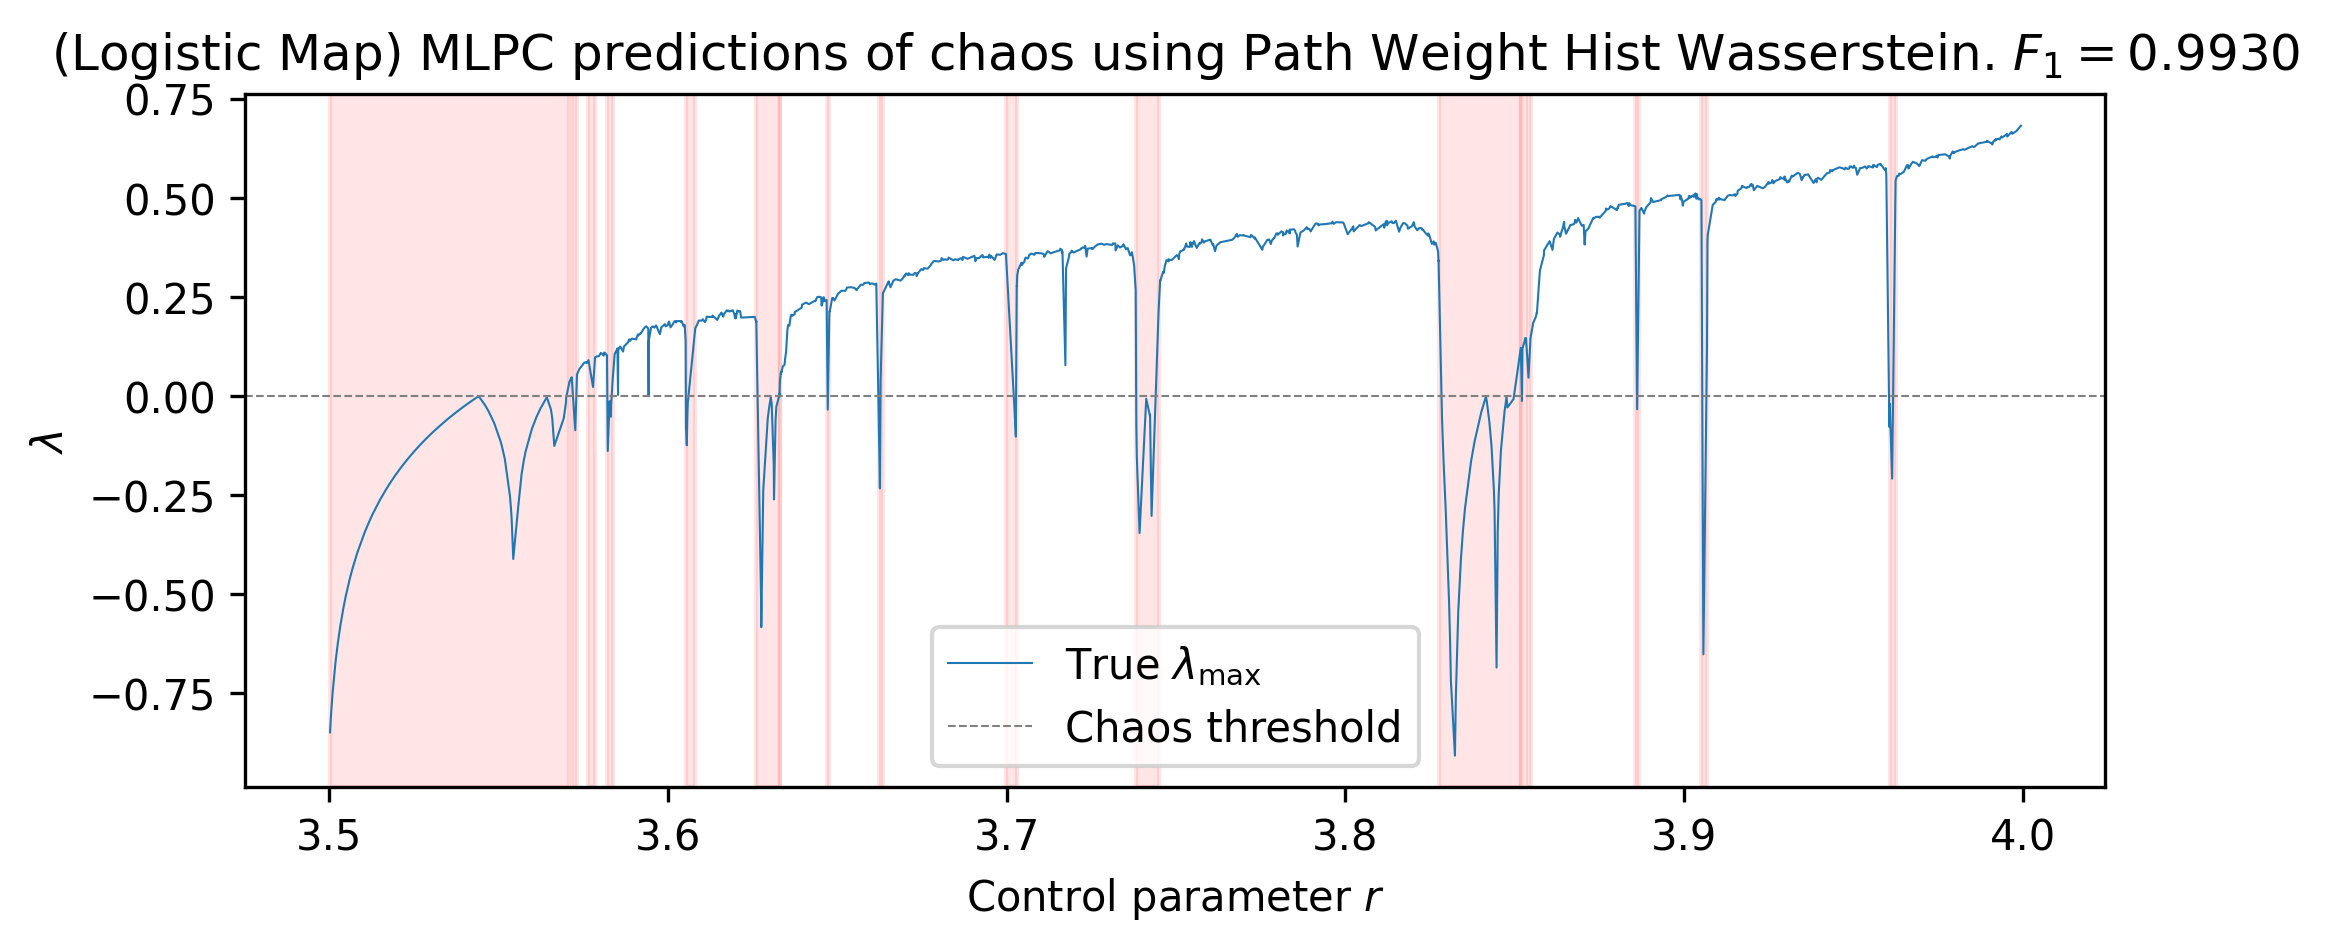

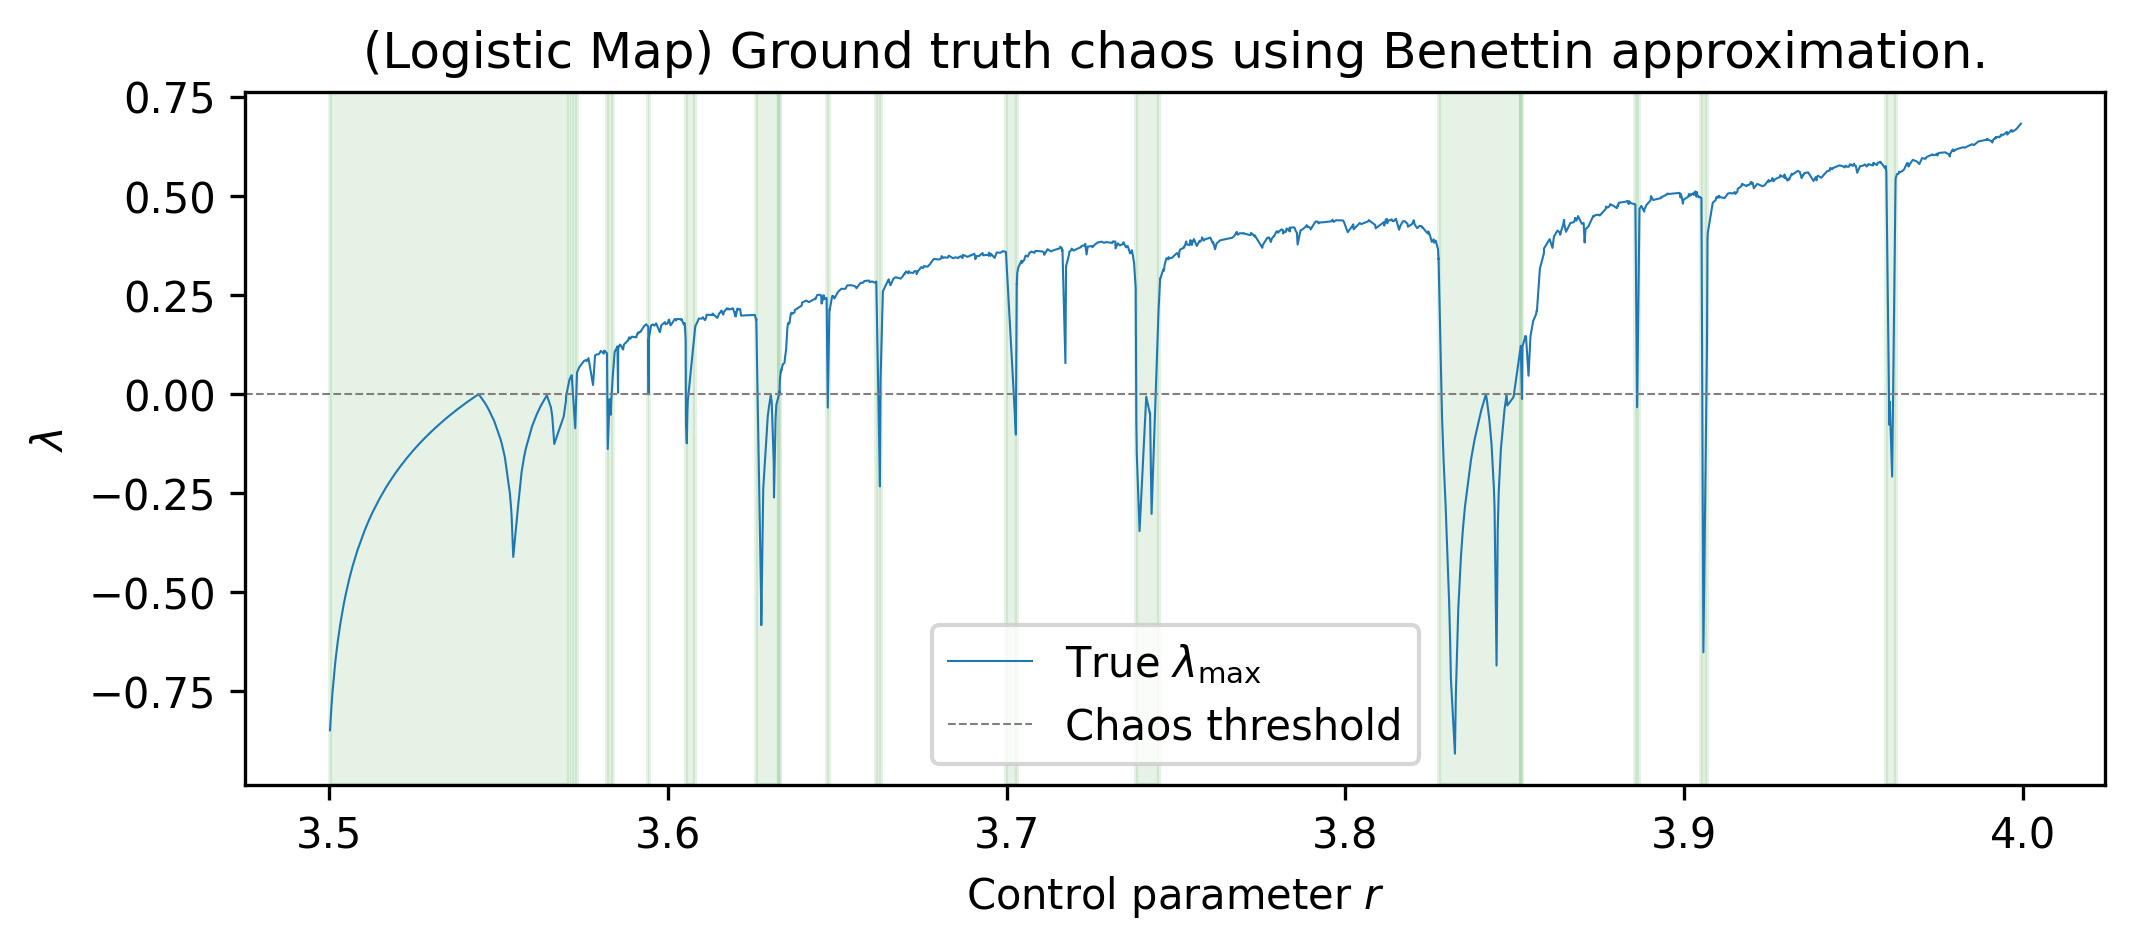

In [471]:

for feature_type in feature_types:
    # feature_type = "hvg"
    # fig, ax1 = plt.subplots(1, 1, figsize=(8, 3), dpi=300)
    # y_pred_R = features_and_predictions[feature_type]["pR"]
    # best_feature_name_R = features_and_predictions[feature_type]["bR"]
    # best_feature_model_R = features_and_predictions[feature_type]["bRm"]
    # mse = mean_squared_error(y_true, y_pred_R)
    # ax1.plot(y_params, y_true, lw=0.8, label=r"True $\lambda_{\max}$ (Benettin)", alpha=0.5)
    # ax1.plot(y_params, y_pred_R, lw=0.8, label="Predicted $\lambda$")
    # ax1.set_xlabel("Control parameter $r$")
    # ax1.set_ylabel("$\lambda$")
    # ax1.axhline(0, c="gray", lw=0.5, ls=":", alpha=0.5)
    # ax1.set_title(f"{best_feature_model_R} predictions of $\lambda$ using {best_feature_name_R}. $MSE={mse:.4f}$")
    # ax1.legend()
    # fig.tight_layout()
    # plt.savefig(f"outputs/figures/white_noise/{feature_type}_classifications.pdf", dpi=300)
    # plt.show()

    fig, ax1 = plt.subplots(1, 1, figsize=(8, 3), dpi=300)

    y_pred_C = features_and_predictions[feature_type]["pC"]
    best_feature_name_C = features_and_predictions[feature_type]["bC"]
    best_feature_model_C = features_and_predictions[feature_type]["bCm"]
    ax1.plot(y_params, y_true, lw=0.5, label=r"True $\lambda_{\max}$")
    f1 = f1_score(y_true>0, y_pred_C)

    # plot the classification predictions as vspans over the graph
    predicted_non_chaos = y_pred_C == False
    x = y_params

    # mark sections of the x-axis where predicted_non_chaos is True
    start = x[0] if predicted_non_chaos[0] else None
    for i in range(1, len(predicted_non_chaos)):
        if not predicted_non_chaos[i-1] and predicted_non_chaos[i]:
            start = x[i-1]
        elif predicted_non_chaos[i-1] and not predicted_non_chaos[i]:
            if start is not None:
                ax1.axvspan(start, x[i], color='red', alpha=0.1)
                start = None
        elif i == len(predicted_non_chaos)-1:  # case for the end of the array
            if start is not None:
                ax1.axvspan(start, x[i], color='red', alpha=0.1)

    ax1.set_xlabel("Control parameter $r$")
    ax1.set_ylabel(r"$\lambda$")
    ax1.axhline(y=0, color='grey', linestyle='--', lw=0.5, label='Chaos threshold')
    ax1.legend()
    ax1.set_title(f"({system.capitalize()} Map) {best_feature_model_C} predictions of chaos using {best_feature_name_C}. $F_1={f1:.4f}$")
    plt.savefig(f"outputs/figures/white_noise/{feature_type}_classifications.pdf", dpi=300)
    plt.show()

fig, ax1 = plt.subplots(1, 1, figsize=(8, 3), dpi=300)
ax1.plot(y_params, y_true, lw=0.5, label=r"True $\lambda_{\max}$")
# plot the classification predictions as vspans over the graph
predicted_non_chaos = y_true <= 0
x = y_params

# mark sections of the x-axis where predicted_non_chaos is True
start = x[0] if predicted_non_chaos[0] else None
for i in range(1, len(predicted_non_chaos)):
    if not predicted_non_chaos[i-1] and predicted_non_chaos[i]:
        start = x[i-1]
    elif predicted_non_chaos[i-1] and not predicted_non_chaos[i]:
        if start is not None:
            ax1.axvspan(start, x[i], color='green', alpha=0.1)
            start = None
    elif i == len(predicted_non_chaos)-1:  # case for the end of the array
        if start is not None:
            ax1.axvspan(start, x[i], color='green', alpha=0.1)

ax1.set_xlabel("Control parameter $r$")
ax1.set_ylabel(r"$\lambda$")
ax1.axhline(y=0, color='grey', linestyle='--', lw=0.5, label='Chaos threshold')
ax1.legend()
ax1.set_title(f"({system.capitalize()} Map) Ground truth chaos using Benettin approximation.")
plt.savefig("outputs/figures/white_noise/true_mle_classifications.pdf", dpi=300)
plt.show()


In [330]:
prediction_test_features.keys()

dict_keys(['classic', 'crocker', 'hvg', 'point_summary'])

In [336]:
prediction_test_features['point_summary'].shape

(1001, 6)

# TABLES

In [14]:

system = "tinkerbell"

systems = ["logistic", "henon", "ikeda", "tinkerbell"]
all_results = []
for system in systems:

    results = system_data(system, BASELINES=True)["results"]  # usually includes dmt 252_50
    if system == "ikeda":
        results = pd.concat([results, system_data(system, DISCRETE=True, OFFSETS=(1,252,50))["results"]],axis=0)

    all_results.append(results)

all_results_df = pd.concat(all_results, keys=map(lambda x: x.capitalize(), systems), axis=1)
all_results_df

Logistic  \
                                                               Train Scores   
                                                                        SVC   
Classic Neighbour Tracing   Rosenstein                             0.973991   
                            Eckmann                                0.996802   
                            Kantz                                  0.995927   
Betti Vector Norms          0D Betti Norm                          0.960334   
                            1D Betti Norm                          0.965273   
HVG Degree Distributions    HVG L1                                 0.884222   
                            HVG L2                                 0.882129   
                            HVG Linf                               0.878681   
                            HVG Wasserstein                        0.876152   
kNN and OPN Point Summaries kNN R(D)                               0.966940   
                            kNN E'(D)                              0.966004   
                            kNN M(D)                               0.965893   
                            OPN R(D)                               0.972858   
                            OPN E'(D)                              0.961022   
                            OPN M(D)                               0.960555   
Topological Divergences     Path Length L1                         0.986766   
                            Path Length L2                         0.986711   
                            Path Length Linf                       0.916896   
                            Path Length L1 (reverse)               0.896796   
                            Path Length L2 (reverse)               0.899012   
                            Path Length Linf (reverse)             0.894203   
                            Path Length Hist Wasserstein           0.985466   
                            Path Length Hist L1                    0.917234   
                            Path Length Hist L2                    0.927337   
                            Path Length Hist Linf                  0.946849   
                            Cophenetic Length L1                   0.976488   
                            Cophenetic Length L2                   0.974143   
                            Cophenetic Length Linf                 0.947902   
                            Cophenetic Length L1 (reverse)         0.933570   
                            Cophenetic Length L2 (reverse)         0.934725   
                            Cophenetic Length Linf (reverse)       0.928037   
                            Cophenetic Length Hist Wasserstein     0.983245   
                            Cophenetic Length Hist L1              0.980301   
                            Cophenetic Length Hist L2              0.980726   
                            Cophenetic Length Hist Linf            0.980937   
                            Path Weight L1                         0.989038   
                            Path Weight L2                         0.988413   
                            Path Weight Linf                       0.984959   
                            Path Weight L1 (reverse)               0.989703   
                            Path Weight L2 (reverse)               0.988440   
                            Path Weight Linf (reverse)             0.984701   
                            Path Weight Hist Wasserstein           0.988409   
                            Path Weight Hist L1                    0.942619   
                            Path Weight Hist L2                    0.984201   
                            Path Weight Hist Linf                  0.977556   
                            Cophenetic Weight L1                   0.993942   
                            Cophenetic Weight L2                   0.982026   
                            Cophenetic Weight Linf                 0.976854   
                            Cophenetic

In [42]:
column_mask = ~all_results_df.columns.get_level_values(2).str.contains('KNR|KNC')
row_mask = ~all_results_df.index.get_level_values(1).str.contains("reverse|Path Length|Cophenetic Length")
table_for_analysis = all_results_df.loc[row_mask,column_mask]

In [75]:
all_train_scores = table_for_analysis.loc[:, (slice(None), 'Train Scores', slice(None))]
all_test_scores = table_for_analysis.loc[:, (slice(None), 'Test Scores', slice(None))]
all_test_correlations = table_for_analysis.loc[:, (slice(None), 'Test Correlations', slice(None))]
all_r2_scores = table_for_analysis.loc[:, (slice(None), 'R2 Feature Scores', slice(None))]

## $R^2$ scores and correlations

In [286]:
def add_a_median_rank_column(scores_df):
    ranked_df = (
        scores_df
        .rank(ascending=False)
        .assign(**{"Median Rank":lambda x: x.median(axis=1)})
        .astype(int)
    )
    return ranked_df

def add_a_mean_value_column(scores_df, with_std=False, mean_col_name="Mean Score", std_col_name="STD Score"):
    mean_df = (
        scores_df
        .assign(**{mean_col_name:lambda x: x.mean(axis=1), std_col_name:lambda x: x.std(axis=1)})
    )
    if not with_std:
        mean_df.columns.drop([std_col_name])
    return mean_df


In [322]:
dfA = all_train_scores
dfB = all_test_correlations.copy()

for level0, level1 in set(zip(dfA.columns.get_level_values(0), dfA.columns.get_level_values(1))):
    # Get the columns for the pair
    sub_df_C = dfA[(level0, level1)][["SVC", "MLPC"]]
    sub_df_R = dfA[(level0, level1)][["SVR", "MLPR"]]

    # Find the column with the max value and add as new column
    max_col_C = sub_df_C.idxmax(axis=1)
    max_col_R = sub_df_R.idxmax(axis=1)
    dfB[(level0, "Test Correlations", "Classifier")] = max_col_C
    dfB[(level0, "Test Correlations", "Regressor")] = max_col_R

    for idx, row in dfB.iterrows():
        best_regressor = row[(level0, "Test Correlations", "Regressor")]
        best_regressor_val = row[(level0, "Test Correlations", f"{best_regressor} Pearson")]
        dfB.at[idx, (level0, "Test Correlations", "Pearson")] = best_regressor_val

system_names = list(map(lambda x: x.capitalize(), systems))
test_correlation_cols_to_keep = [(system, "Test Correlations", "Pearson") for system in system_names]
table_of_correlations = dfB[test_correlation_cols_to_keep]
table_of_correlations
table_of_correlations.columns = table_of_correlations.columns.droplevel(1)
table_of_correlations.columns = table_of_correlations.columns.swaplevel(0, 1)
table_of_correlations = table_of_correlations.sort_index(axis=1)
table_of_correlations
pearson_table = add_a_mean_value_column(table_of_correlations, with_std=True, mean_col_name="Mean Pearson", std_col_name="Std Pearson")
pearson_table = pearson_table.droplevel(0)
pearson_table = pearson_table.style.background_gradient(cmap='YlGn_r', subset='Mean Pearson', axis=0).format(precision=3)

print(pearson_table.to_latex(convert_css=True))
pearson_table

\begin{tabular}{lrrrrrr}
 & \multicolumn{4}{r}{Pearson} & Mean Pearson & Std Pearson \\
 & Henon & Ikeda & Logistic & Tinkerbell &  &  \\
Rosenstein & 0.552 & 0.385 & 0.785 & 0.765 & {\cellcolor[HTML]{005E33}} \color[HTML]{F1F1F1} 0.621 & 0.164 \\
Eckmann & 0.956 & 0.960 & 0.912 & 0.859 & {\cellcolor[HTML]{FFFFE5}} \color[HTML]{000000} 0.922 & 0.041 \\
Kantz & 0.920 & 0.911 & 0.925 & 0.780 & {\cellcolor[HTML]{F8FCBD}} \color[HTML]{000000} 0.884 & 0.060 \\
0D Betti Norm & 0.856 & 0.914 & 0.888 & 0.857 & {\cellcolor[HTML]{F6FCB8}} \color[HTML]{000000} 0.879 & 0.024 \\
1D Betti Norm & 0.822 & 0.855 & 0.844 & 0.776 & {\cellcolor[HTML]{C9E99C}} \color[HTML]{000000} 0.824 & 0.030 \\
HVG L1 & 0.670 & 0.809 & 0.800 & 0.719 & {\cellcolor[HTML]{6FC174}} \color[HTML]{000000} 0.749 & 0.058 \\
HVG L2 & 0.629 & 0.843 & 0.790 & 0.714 & {\cellcolor[HTML]{68BE71}} \color[HTML]{000000} 0.744 & 0.081 \\
HVG Linf & 0.650 & 0.793 & 0.794 & 0.594 & {\cellcolor[HTML]{3CA458}} \color[HTML]{F1F1F1} 0.708 & 0.0

In [293]:
all_test_correlations

Logistic  \
                                                               Test Correlations   
                                                                    SVR Spearman   
Classic Neighbour Tracing   Rosenstein                                  0.472484   
                            Eckmann                                     0.726022   
                            Kantz                                       0.894463   
Betti Vector Norms          0D Betti Norm                               0.917338   
                            1D Betti Norm                               0.742970   
HVG Degree Distributions    HVG L1                                      0.827661   
                            HVG L2                                      0.801108   
                            HVG Linf                                    0.819379   
                            HVG Wasserstein                             0.828710   
kNN and OPN Point Summaries kNN R(D)                                    0.340968   
                            kNN E'(D)                                   0.663457   
                            kNN M(D)                                    0.714128   
                            OPN R(D)                                    0.744754   
                            OPN E'(D)                                   0.666272   
                            OPN M(D)                                    0.911244   
Topological Divergences     Path Weight L1                              0.827874   
                            Path Weight L2                              0.838982   
                            Path Weight Linf                            0.869566   
                            Path Weight Hist Wasserstein                0.944871   
                            Path Weight Hist L1                         0.926880   
                            Path Weight Hist L2                         0.938317   
                            Path Weight Hist Linf                       0.693605   
                            Cophenetic Weight L1                        0.748790   
                            Cophenetic Weight L2                        0.775557   
                            Cophenetic Weight Linf                      0.636011   
                            Cophenetic Weight Hist Wasserstein          0.663644   
                            Cophenetic Weight Hist L1                   0.925612   
                            Cophenetic Weight Hist L2                   0.938214   
                            Cophenetic Weight Hist Linf                 0.694171   

                                                                            \
                                                                             
                                                               SVR Pearson   
Classic Neighbour Tracing   Rosenstein                            0.767016   
                            Eckmann                               0.911726   
                            Kantz                                 0.924777   
Betti Vector Norms          0D Betti Norm                         0.888436   
                            1D Betti Norm                         0.843988   
HVG Degree Distributions    HVG L1                                0.800107   
                            HVG L2                                0.790019   
                            HVG Linf                              0.794322   
                            HVG Wasserstein                       0.770915   
kNN and OPN Point Summaries kNN R(D)                              0.579602   
                            kNN E'(D)                             0.819364   
                            kNN M(D)                              0.843737   
                            OPN R(D)                              0.856346   
                            OPN E'(D)                             0.830008   
                            OPN M(D)                     

In [292]:
r2_cols_to_keep = [(system, "R2 Feature Scores", "Raw R2 Adjusted") for system in ["Logistic", "Henon", "Ikeda", "Tinkerbell"]]
r2_adjusted_scores = all_r2_scores[r2_cols_to_keep]
r2_adjusted_scores.columns = r2_adjusted_scores.columns.droplevel(1)
r2_adjusted_scores.columns = r2_adjusted_scores.columns.swaplevel(0, 1)
r2_adjusted_scores = r2_adjusted_scores.sort_index(axis=1)
r2_adjusted_scores
r2_table = add_a_mean_value_column(r2_adjusted_scores, with_std=True, mean_col_name="Mean R2", std_col_name="Std R2")
r2_table = r2_table.droplevel(0)
r2_table = r2_table.style.background_gradient(cmap='YlGn_r', subset='Mean R2', axis=0).format(precision=3)

print(r2_table.to_latex(convert_css=True))
r2_table

\begin{tabular}{lrrrrrr}
 & \multicolumn{4}{r}{Raw R2 Adjusted} & Mean R2 & Std R2 \\
 & Henon & Ikeda & Logistic & Tinkerbell &  &  \\
Rosenstein & 0.176 & 0.091 & 0.384 & 0.014 & {\cellcolor[HTML]{006234}} \color[HTML]{F1F1F1} 0.166 & 0.138 \\
Eckmann & 0.870 & 0.861 & 0.800 & 0.686 & {\cellcolor[HTML]{FFFFE5}} \color[HTML]{000000} 0.804 & 0.073 \\
Kantz & 0.810 & 0.781 & 0.750 & 0.552 & {\cellcolor[HTML]{F8FCBD}} \color[HTML]{000000} 0.723 & 0.101 \\
0D Betti Norm & 0.714 & 0.752 & 0.707 & 0.692 & {\cellcolor[HTML]{F7FCBA}} \color[HTML]{000000} 0.716 & 0.022 \\
1D Betti Norm & 0.001 & 0.304 & 0.257 & 0.182 & {\cellcolor[HTML]{016937}} \color[HTML]{F1F1F1} 0.186 & 0.115 \\
HVG L1 & 0.060 & 0.012 & 0.228 & 0.126 & {\cellcolor[HTML]{00492B}} \color[HTML]{F1F1F1} 0.107 & 0.081 \\
HVG L2 & 0.021 & -0.000 & 0.205 & 0.146 & {\cellcolor[HTML]{004529}} \color[HTML]{F1F1F1} 0.093 & 0.085 \\
HVG Linf & 0.026 & -0.001 & 0.288 & 0.088 & {\cellcolor[HTML]{00472A}} \color[HTML]{F1F1F1} 0.100 & 0.1

## Selecting the best model for use on the test data

In [99]:
all_train_scores

Logistic  \
                                                               Train Scores   
                                                                        SVC   
Classic Neighbour Tracing   Rosenstein                             0.973991   
                            Eckmann                                0.996802   
                            Kantz                                  0.995927   
Betti Vector Norms          0D Betti Norm                          0.960334   
                            1D Betti Norm                          0.965273   
HVG Degree Distributions    HVG L1                                 0.884222   
                            HVG L2                                 0.882129   
                            HVG Linf                               0.878681   
                            HVG Wasserstein                        0.876152   
kNN and OPN Point Summaries kNN R(D)                               0.966940   
                            kNN E'(D)                              0.966004   
                            kNN M(D)                               0.965893   
                            OPN R(D)                               0.972858   
                            OPN E'(D)                              0.961022   
                            OPN M(D)                               0.960555   
Topological Divergences     Path Weight L1                         0.989038   
                            Path Weight L2                         0.988413   
                            Path Weight Linf                       0.984959   
                            Path Weight Hist Wasserstein           0.988409   
                            Path Weight Hist L1                    0.942619   
                            Path Weight Hist L2                    0.984201   
                            Path Weight Hist Linf                  0.977556   
                            Cophenetic Weight L1                   0.993942   
                            Cophenetic Weight L2                   0.982026   
                            Cophenetic Weight Linf                 0.976854   
                            Cophenetic Weight Hist Wasserstein     0.931148   
                            Cophenetic Weight Hist L1              0.941910   
                            Cophenetic Weight Hist L2              0.984122   
                            Cophenetic Weight Hist Linf            0.977326   

                                                                          \
                                                                           
                                                                     SVR   
Classic Neighbour Tracing   Rosenstein                         -0.034454   
                            Eckmann                            -0.014988   
                            Kantz                              -0.014200   
Betti Vector Norms          0D Betti Norm                      -0.019065   
                            1D Betti Norm                      -0.024598   
HVG Degree Distributions    HVG L1                             -0.032705   
                            HVG L2                             -0.034018   
                            HVG Linf                           -0.035273   
                            HVG Wasserstein                    -0.039311   
kNN and OPN Point Summaries kNN R(D)                           -0.045093   
                            kNN E'(D)                          -0.029037   
                            kNN M(D)                           -0.024864   
                            OPN R(D)                           -0.023105   
                            OPN E'(D)                          -0.026683   
                            OPN M(D)                           -0.021262   
Topological Divergences     Path Weight L1                     -0.018170   
                            Path Weight L2                     -0.017239   
                  

In [365]:
dfA = all_train_scores
dfB = all_test_scores.copy()

for level0, level1 in set(zip(dfA.columns.get_level_values(0), dfA.columns.get_level_values(1))):
    # Get the columns for the pair
    sub_df_C = dfA[(level0, level1)][["SVC", "MLPC"]]
    sub_df_R = dfA[(level0, level1)][["SVR", "MLPR"]]

    # Find the column with the max value and add as new column
    max_col_C = sub_df_C.idxmax(axis=1)
    max_col_R = sub_df_R.idxmax(axis=1)
    dfB[(level0, "Test Scores", "Classifier")] = max_col_C
    dfB[(level0, "Test Scores", "Regressor")] = max_col_R

    for idx, row in dfB.iterrows():
        best_classifier = row[(level0, "Test Scores", "Classifier")]
        best_classifier_val = row[(level0, "Test Scores", best_classifier)]
        dfB.at[idx, (level0, "Test Scores", "Classifier Score")] = best_classifier_val
        best_regressor = row[(level0, "Test Scores", "Regressor")]
        best_regressor_val = row[(level0, "Test Scores", best_regressor)]
        dfB.at[idx, (level0, "Test Scores", "Regressor Score")] = best_regressor_val

dfB[["Logistic"]]

Logistic  \
                                                               Test Scores   
                                                                       SVC   
Classic Neighbour Tracing   Rosenstein                            0.975339   
                            Eckmann                               0.996217   
                            Kantz                                 0.995589   
Betti Vector Norms          0D Betti Norm                         0.958060   
                            1D Betti Norm                         0.962818   
HVG Degree Distributions    HVG L1                                0.888760   
                            HVG L2                                0.888265   
                            HVG Linf                              0.886644   
                            HVG Wasserstein                       0.882812   
kNN and OPN Point Summaries kNN R(D)                              0.965607   
                            kNN E'(D)                             0.963777   
                            kNN M(D)                              0.964706   
                            OPN R(D)                              0.972308   
                            OPN E'(D)                             0.961413   
                            OPN M(D)                              0.958853   
Topological Divergences     Path Weight L1                        0.993034   
                            Path Weight L2                        0.987952   
                            Path Weight Linf                      0.985397   
                            Path Weight Hist Wasserstein          0.992376   
                            Path Weight Hist L1                   0.941176   
                            Path Weight Hist L2                   0.981493   
                            Path Weight Hist Linf                 0.976388   
                            Cophenetic Weight L1                  0.993695   
                            Cophenetic Weight L2                  0.984287   
                            Cophenetic Weight Linf                0.977444   
                            Cophenetic Weight Hist Wasserstein    0.936499   
                            Cophenetic Weight Hist L1             0.941742   
                            Cophenetic Weight Hist L2             0.980217   
                            Cophenetic Weight Hist Linf           0.975765   

                                                                          \
                                                                           
                                                                     SVR   
Classic Neighbour Tracing   Rosenstein                         -0.033761   
                            Eckmann                            -0.013747   
                            Kantz                              -0.012267   
Betti Vector Norms          0D Betti Norm                      -0.017351   
                            1D Betti Norm                      -0.023509   
HVG Degree Distributions    HVG L1                             -0.030102   
                            HVG L2                             -0.031471   
                            HVG Linf                           -0.031249   
                            HVG Wasserstein                    -0.033762   
kNN and OPN Point Summaries kNN R(D)                           -0.056167   
                            kNN E'(D)                          -0.027027   
                            kNN M(D)                           -0.023559   
                            OPN R(D)                           -0.022303   
                            OPN E'(D)                          -0.025665   
                            OPN M(D)                           -0.019039   
Topological Divergences     Path Weight L1                     -0.015789   
                            Path Weight L2                     -0.014741   
                            Path Weight Linf     

In [223]:
system_names = list(map(lambda x: x.capitalize(), systems))
test_score_cols_to_keep = []
test_score_cols_to_keep += [(system, "Test Scores", "Classifier Score") for system in system_names]
test_score_cols_to_keep += [(system, "Test Scores", "Regressor Score") for system in system_names]

In [224]:
test_score_cols_to_keep

[('Logistic', 'Test Scores', 'Classifier Score'),
 ('Henon', 'Test Scores', 'Classifier Score'),
 ('Ikeda', 'Test Scores', 'Classifier Score'),
 ('Tinkerbell', 'Test Scores', 'Classifier Score'),
 ('Logistic', 'Test Scores', 'Regressor Score'),
 ('Henon', 'Test Scores', 'Regressor Score'),
 ('Ikeda', 'Test Scores', 'Regressor Score'),
 ('Tinkerbell', 'Test Scores', 'Regressor Score')]

In [253]:
test_df = dfB[test_score_cols_to_keep]
test_df.columns = test_df.columns.droplevel(1)
test_df.columns = test_df.columns.swaplevel(0, 1)
test_df = test_df.sort_index(axis=1)

test_df = (
    test_df
    .rank(ascending=False)
    .assign(**{"Median Rank":lambda x: x.median(axis=1)})
    .astype(int)
    .style
        .background_gradient(cmap='YlGn', subset='Median Rank', axis=0)
)

# test_df = test_df.sort_index(axis=1)
# test_df.columns = test_df.columns.droplevel(1)
# cols = test_df.columns.tolist()
# cols[-1] = ('Median Rank', None, None)
# test_df.columns = pd.MultiIndex.from_tuples(cols)

print(test_df.to_latex())
test_df

\begin{tabular}{llrrrrrrrrr}
 &  & \multicolumn{4}{r}{Classifier Score} & \multicolumn{4}{r}{Regressor Score} & Median Rank \\
 &  & Henon & Ikeda & Logistic & Tinkerbell & Henon & Ikeda & Logistic & Tinkerbell &  \\
\multirow[c]{3}{*}{Classic Neighbour Tracing} & Rosenstein & 24 & 28 & 13 & 15 & 29 & 29 & 26 & 8 & \background-color#005a31 \color#f1f1f1 25 \\
 & Eckmann & 1 & 6 & 1 & 1 & 1 & 2 & 7 & 1 & \background-color#ffffe5 \color#000000 1 \\
 & Kantz & 2 & 15 & 2 & 19 & 4 & 13 & 4 & 5 & \background-color#f8fcbd \color#000000 4 \\
\multirow[c]{2}{*}{Betti Vector Norms} & 0D Betti Norm & 20 & 14 & 24 & 10 & 16 & 10 & 14 & 2 & \background-color#77c679 \color#000000 14 \\
 & 1D Betti Norm & 21 & 18 & 19 & 26 & 21 & 17 & 19 & 7 & \background-color#30954f \color#f1f1f1 19 \\
\multirow[c]{4}{*}{HVG Degree Distributions} & HVG L1 & 26 & 22 & 28 & 21 & 25 & 21 & 22 & 15 & \background-color#13773d \color#f1f1f1 22 \\
 & HVG L2 & 25 & 20 & 27 & 23 & 28 & 18 & 23 & 16 & \background-color#086e

In [219]:
dfB

Logistic  \
                                                               Test Scores   
                                                                       SVC   
Classic Neighbour Tracing   Rosenstein                            0.975339   
                            Eckmann                               0.996217   
                            Kantz                                 0.995589   
Betti Vector Norms          0D Betti Norm                         0.958060   
                            1D Betti Norm                         0.962818   
HVG Degree Distributions    HVG L1                                0.888760   
                            HVG L2                                0.888265   
                            HVG Linf                              0.886644   
                            HVG Wasserstein                       0.882812   
kNN and OPN Point Summaries kNN R(D)                              0.965607   
                            kNN E'(D)                             0.963777   
                            kNN M(D)                              0.964706   
                            OPN R(D)                              0.972308   
                            OPN E'(D)                             0.961413   
                            OPN M(D)                              0.958853   
Topological Divergences     Path Weight L1                        0.993034   
                            Path Weight L2                        0.987952   
                            Path Weight Linf                      0.985397   
                            Path Weight Hist Wasserstein          0.992376   
                            Path Weight Hist L1                   0.941176   
                            Path Weight Hist L2                   0.981493   
                            Path Weight Hist Linf                 0.976388   
                            Cophenetic Weight L1                  0.993695   
                            Cophenetic Weight L2                  0.984287   
                            Cophenetic Weight Linf                0.977444   
                            Cophenetic Weight Hist Wasserstein    0.936499   
                            Cophenetic Weight Hist L1             0.941742   
                            Cophenetic Weight Hist L2             0.980217   
                            Cophenetic Weight Hist Linf           0.975765   

                                                                          \
                                                                           
                                                                     SVR   
Classic Neighbour Tracing   Rosenstein                         -0.033761   
                            Eckmann                            -0.013747   
                            Kantz                              -0.012267   
Betti Vector Norms          0D Betti Norm                      -0.017351   
                            1D Betti Norm                      -0.023509   
HVG Degree Distributions    HVG L1                             -0.030102   
                            HVG L2                             -0.031471   
                            HVG Linf                           -0.031249   
                            HVG Wasserstein                    -0.033762   
kNN and OPN Point Summaries kNN R(D)                           -0.056167   
                            kNN E'(D)                          -0.027027   
                            kNN M(D)                           -0.023559   
                            OPN R(D)                           -0.022303   
                            OPN E'(D)                          -0.025665   
                            OPN M(D)                           -0.019039   
Topological Divergences     Path Weight L1                     -0.015789   
                            Path Weight L2                     -0.014741   
                            Path Weight Linf     

In [247]:
train_score_columns = [
    ("Train Scores", "SVR"),
    ("Train Scores", "MLPR"),
    ("Train Scores", "SVC"),
    ("Train Scores", "MLPC")
]


test_score_columns = [
    ("Test Scores", "SVR"),
    ("Test Scores", "MLPR"),
    ("Test Scores", "SVC"),
    ("Test Scores", "MLPC")
]
test_corr_columns = [
    ("Test Correlations", "SVR Pearson"),
    ("Test Correlations", "MLPR Pearson"),
    ("Test Correlations", "SVR Spearman"),
    ("Test Correlations", "MLPR Spearman"),
]

test_r2_columns = [
    ("R2 Feature Scores", "Raw R2"),
    ("R2 Feature Scores", "Raw R2 Adjusted"),
]

test_columns_of_interest = test_score_columns + test_corr_columns + test_r2_columns

rows_to_exclude = results_w_baseline.index.get_level_values(1).str.contains("reverse|Path Length|Cophenetic Length")
mt_rows_to_exclude = plmt_results_252_50.index.get_level_values(1).str.contains("reverse|Path Length|Cophenetic Length")

In [248]:
columns_of_interest = train_score_columns
if system == "ikeda":
    table_to_show = pd.concat(
        [
            results_w_baseline[columns_of_interest][~rows_to_exclude],
            dmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
            # plmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
        ]
    )
else:
    table_to_show = pd.concat(
        [
            results_w_baseline[columns_of_interest][~rows_to_exclude],
            # plmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
        ]
    )
# table_to_show[("Train Scores", "Best Regressor")] = np.maximum(table_to_show[("Train Scores", "SVR")], table_to_show[("Train Scores", "MLPR")])
# table_to_show[("Train Scores", "Best Classifier")] = np.maximum(table_to_show[("Train Scores", "SVC")], table_to_show[("Train Scores", "MLPC")])
training_results = (
    table_to_show
    .rank(ascending=False)
    # .assign(**{"Median Rank":lambda x: x.median(axis=1)})
    .astype(int)
    .style
        # .background_gradient(cmap='RdYlGn_r', subset='Median Rank', axis=0)
        # .highlight_min(color='green', axis=0)
        # .format({'MAD Rank': "{:.2f}"})
)
print(training_results.to_latex())
training_results
# logistic_results_w_baseline[columns_of_interest].style.highlight_max(color='green', axis=0)

\begin{tabular}{llrrrr}
 &  & \multicolumn{4}{r}{Train Scores} \\
 &  & SVR & MLPR & SVC & MLPC \\
\multirow[c]{3}{*}{Classic Neighbour Tracing} & Rosenstein & 12 & 9 & 14 & 14 \\
 & Eckmann & 20 & 1 & 1 & 1 \\
 & Kantz & 7 & 3 & 16 & 18 \\
\multirow[c]{2}{*}{Betti Vector Norms} & 0D Betti Norm & 8 & 2 & 17 & 17 \\
 & 1D Betti Norm & 15 & 4 & 21 & 21 \\
\multirow[c]{4}{*}{HVG Degree Distributions} & HVG L1 & 24 & 14 & 23 & 23 \\
 & HVG L2 & 27 & 16 & 24 & 25 \\
 & HVG Linf & 28 & 26 & 27 & 28 \\
 & HVG Wasserstein & 29 & 27 & 28 & 29 \\
\multirow[c]{6}{*}{kNN and OPN Point Summaries} & kNN R(D) & 26 & 28 & 29 & 27 \\
 & kNN E'(D) & 23 & 23 & 25 & 24 \\
 & kNN M(D) & 11 & 8 & 22 & 22 \\
 & OPN R(D) & 19 & 11 & 20 & 20 \\
 & OPN E'(D) & 14 & 10 & 19 & 19 \\
 & OPN M(D) & 25 & 21 & 26 & 26 \\
\multirow[c]{14}{*}{Topological Divergences} & Path Weight L1 & 10 & 22 & 12 & 11 \\
 & Path Weight L2 & 9 & 18 & 13 & 13 \\
 & Path Weight Linf & 22 & 25 & 18 & 16 \\
 & Path Weight Hist Wasserstein

In [231]:
columns_of_interest = test_score_columns
if system == "ikeda":
    table_to_show = pd.concat(
        [
            results_w_baseline[columns_of_interest][~rows_to_exclude],
            dmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
            # plmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
        ]
    )
else:
    table_to_show = pd.concat(
        [
            results_w_baseline[columns_of_interest][~rows_to_exclude],
            # plmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
        ]
    )
(
    table_to_show
    .rank(ascending=False)
    # .assign(**{"Median Rank":lambda x: x.median(axis=1)})
    .astype(int)
    # .assign(**{"MAD Rank":lambda x: x.mad(axis=1)})
    .style
        # .highlight_min(color='green', axis=0)
        # .background_gradient(cmap='RdYlGn_r', subset='Median Rank', axis=0)
)
# logistic_results_w_baseline[columns_of_interest].style.highlight_max(color='green', axis=0)

In [218]:
columns_of_interest = test_corr_columns
if system == "ikeda":
    table_to_show = pd.concat(
        [
            results_w_baseline[columns_of_interest][~rows_to_exclude],
            dmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
            # plmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
        ]
    )
else:
    table_to_show = pd.concat(
        [
            results_w_baseline[columns_of_interest][~rows_to_exclude],
            # plmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
        ]
    )
(
    table_to_show
    .rank(ascending=False)
    .assign(**{"Median Rank":lambda x: x.median(axis=1)})
    .astype(int)
    # .assign(**{"MAD Rank":lambda x: x.mad(axis=1)})
    .style
        # .highlight_min(color='green', axis=0)
        .background_gradient(cmap='RdYlGn_r', subset='Median Rank', axis=0)
)
# logistic_results_w_baseline[columns_of_interest].style.highlight_max(color='green', axis=0)

In [219]:
columns_of_interest = test_r2_columns
if system == "ikeda":
    table_to_show = pd.concat(
        [
            results_w_baseline[columns_of_interest][~rows_to_exclude],
            dmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
            # plmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
        ]
    )
else:
    table_to_show = pd.concat(
        [
            results_w_baseline[columns_of_interest][~rows_to_exclude],
            # plmt_results_252_50[columns_of_interest][~mt_rows_to_exclude],
        ]
    )
(
    table_to_show
    .rank(ascending=False)
    .assign(**{"Median Rank":lambda x: x.median(axis=1)})
    .astype(int)
    # .assign(**{"MAD Rank":lambda x: x.mad(axis=1)})
    .style
        # .highlight_min(color='green', axis=0)
        .background_gradient(cmap='RdYlGn_r', subset='Median Rank', axis=0)
)
# logistic_results_w_baseline[columns_of_interest].style.highlight_max(color='green', axis=0)